# E-Commerce Shipping Data

Full end-to-end Machine Learning and Data Mining solution to provide analysis and to predict if the shipments were delivered on time or not using Supervised and unsupervised learning, Neural Networks, and Convolutional Neural Networks.


# Part 1. Data Analysis and Bayes Nets.


# Part 2. Clustering

# Part 3. Supervised Learning: Generalisation & Overfitting; Decision trees.


# Part 4. Neural Networks and Convolutional Neural Networks.

# Part 5. Research Question (Finding interesting Properities)


                                   The Importance of the E-commerce Shipping Dataset 
  
Reasons for choosing this data set:

E-Commerce plays a significant role in our world nowadays. Companies like Amazon, Noon, and Food deliveries such as Talabat and Delivero face different challenges every day to provide the best customer service and to deliver the shipments and items on time and improve the customer rating at the same time. 

Some Questions we need to answer like the following:
Was the shipment delivered on time or not?
If Product importance or the number of customer care calls are high, the item will be delivered on time?
What is the Customer rating? 

Other interesting findings will be discovered with the below analysis and exploration of the data.

Source of dataset : https://www.kaggle.com/prachi13/customer-analytics


In [1]:
# import libaries 
import pandas as pd
import seaborn as sns
import numpy as np # linear algebra

# plot figures
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from fast_ml.outlier_treatment import OutlierTreatment 
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_samples, silhouette_score

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap


#import kmeans
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neural_network import MLPClassifier

#decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_recall_fscore_support
pd.options.mode.chained_assignment = None

# ROC 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

# Initial Data Exploration

In [2]:
#load the data
df=pd.read_csv("Data.csv")
#Number of entries and attributes
df.shape

(10999, 12)

In [3]:
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [4]:
# more info about the data such as number of Attributes (columns), null / non null data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# Checking the null values
#df.isna().values.any() --> this is other way to check the null values if any
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Observations:
There are 10999 entries and 12 Columns/attributes with no null data.
There are object as type data for cateogories attributes and numeric values for other attributes as integer64. 
ID is not important and can be dropped.

# Cleaning the data

In [6]:
# copy df to data for cleaning operations
data=df.copy()

In [7]:
# drop ID since it is not important
data.drop('ID', axis = 1, inplace = True)

In [8]:
data.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

# Visualizing the data

In [9]:
data.describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

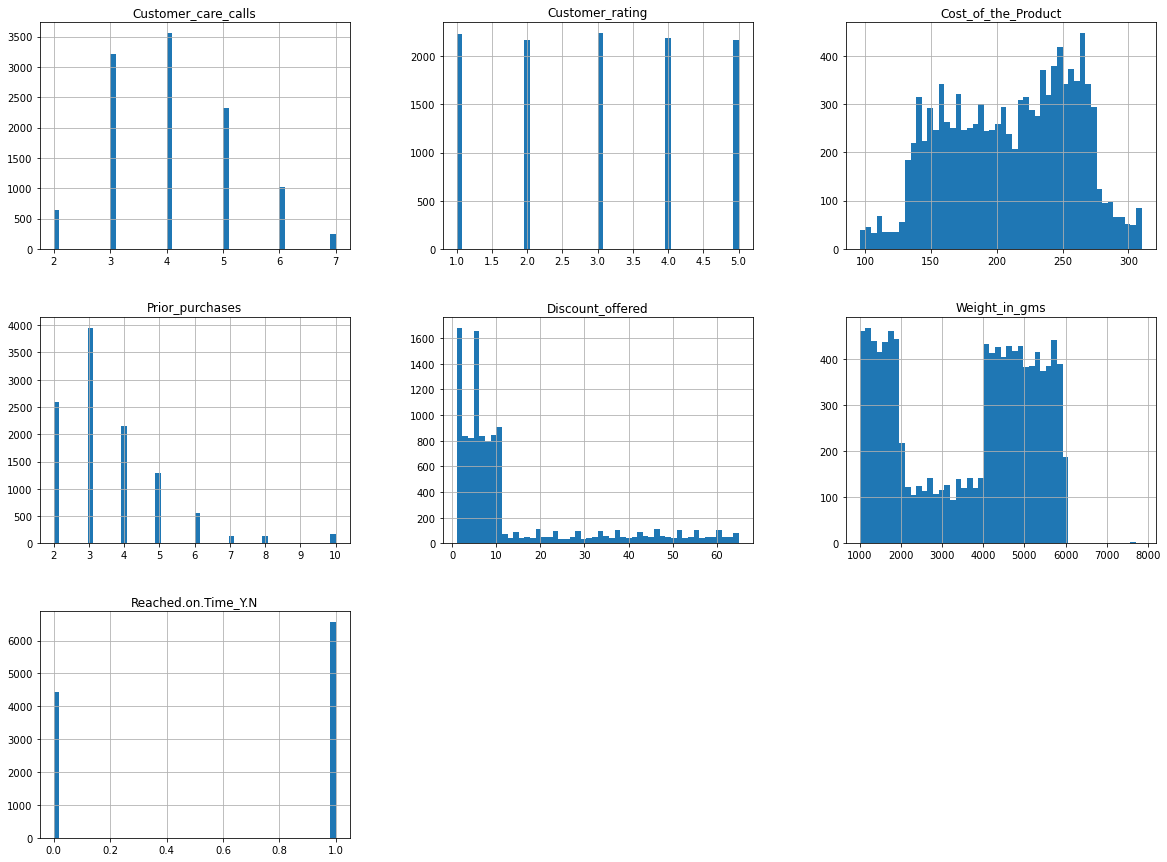

In [10]:
# Plot a histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.show()

Observations:
Discount offered and Weights in grams show skewed distribution

# Checking the correlation between features

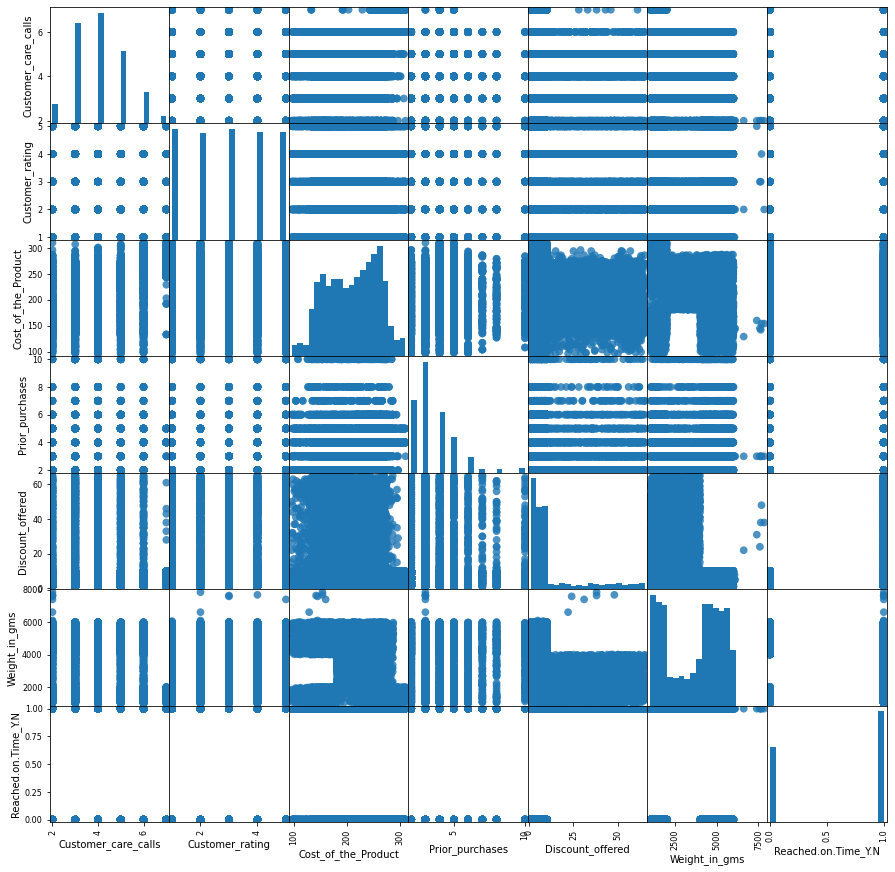

In [11]:
# Check the corrleation between attributes
scatter_matrix(data, marker='o', figsize=(15, 15), hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

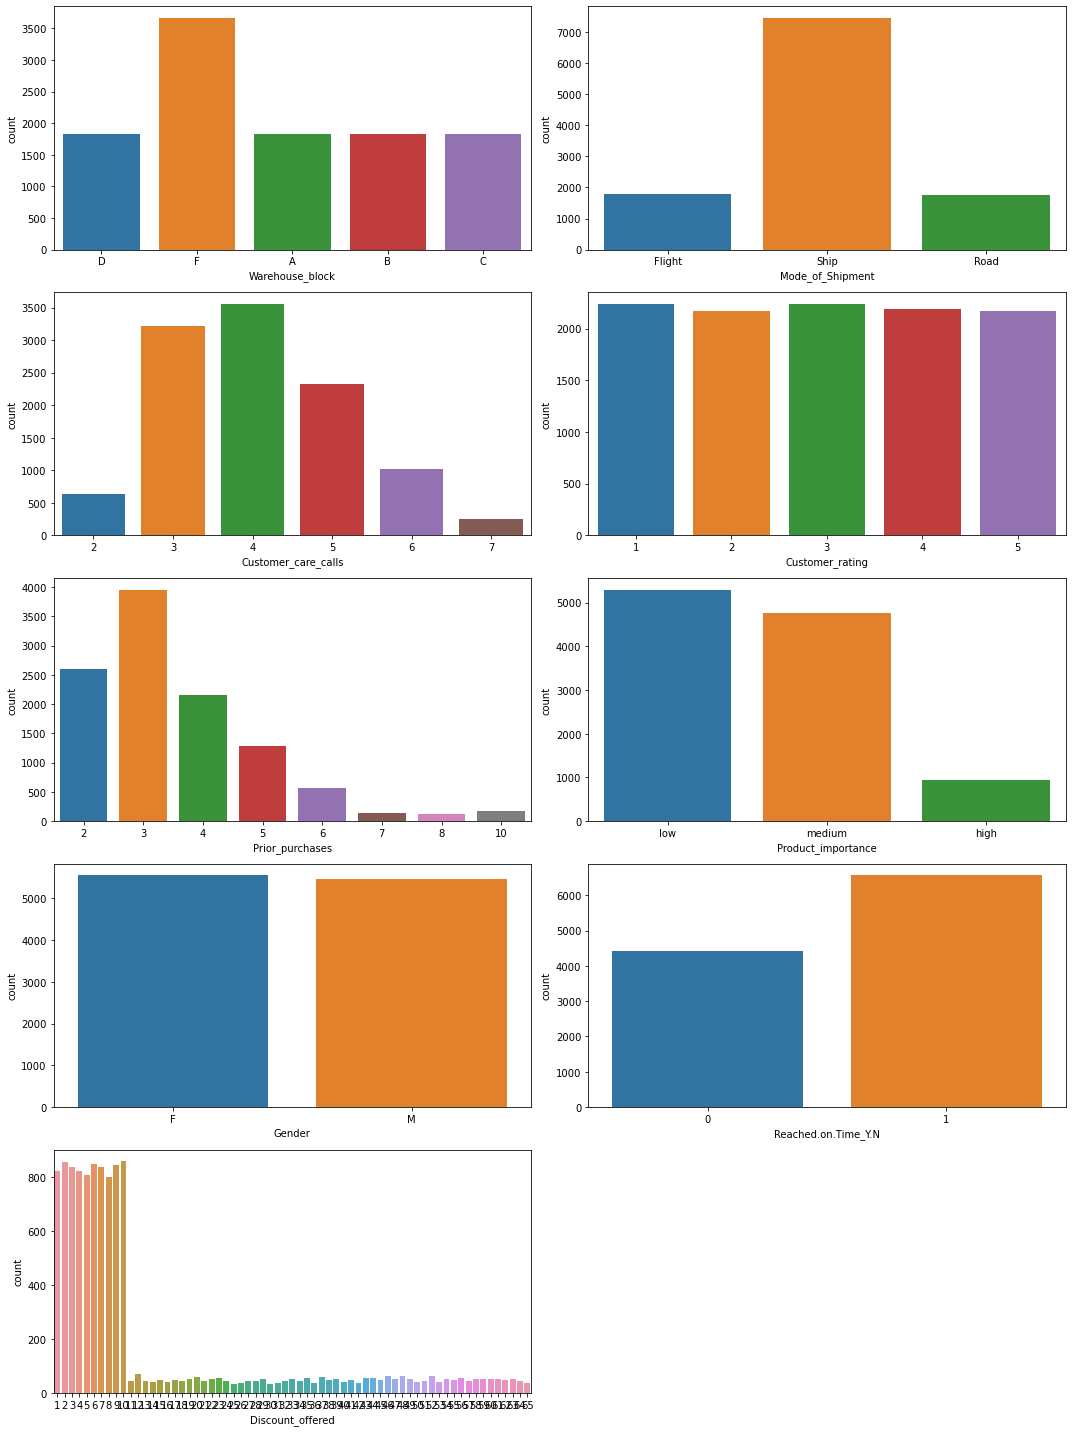

In [12]:
# Showing the counts with categories for the below coulmns
columns = ["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", 
"Customer_rating", "Prior_purchases", "Product_importance", "Gender", "Reached.on.Time_Y.N", "Discount_offered" ]
plt.figure(figsize = (15, 20))
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = columns[i],ax=ax, data = data)
    plotnumber += 1
    plt.tight_layout()
plt.show()

Observations:
1- Males count are almost the same like females
2- Number of items reached on time is bigger
3- Number of product importance Low and Medium are bigger than high
4- Warehouse F is the highest
5- Movement by ship is the highest
6- Discount_offered and Weight_in_gms shows skewed distribution 

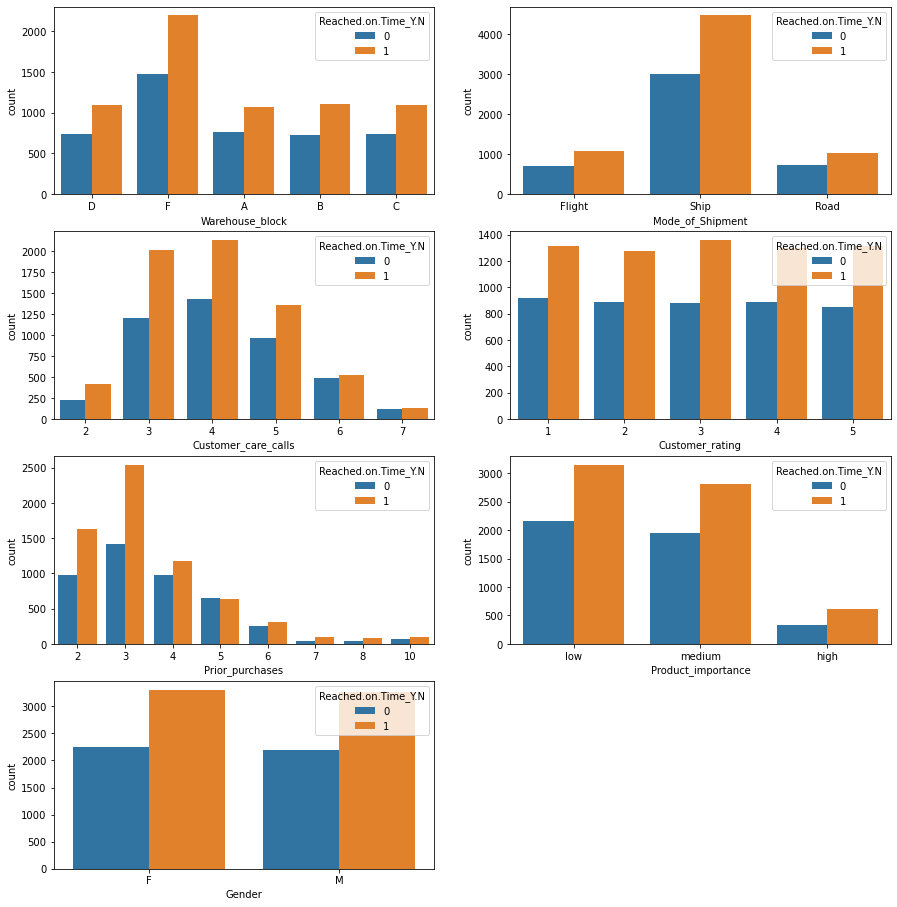

In [13]:
# Explore the relation between Reached on time and other attributes
columns = ["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", 
"Customer_rating", "Prior_purchases", "Product_importance", "Gender"]
plt.figure(figsize = (15, 20))
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 9:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot( columns[i], hue ='Reached.on.Time_Y.N',  data = data, ax=ax)
    plotnumber += 1
plt.show()

Conclusion: 
1- Products delievered on time with ship more than Road or flight
2- Products delievered on time with the product imprtance of (low and medium) are more than High importance.

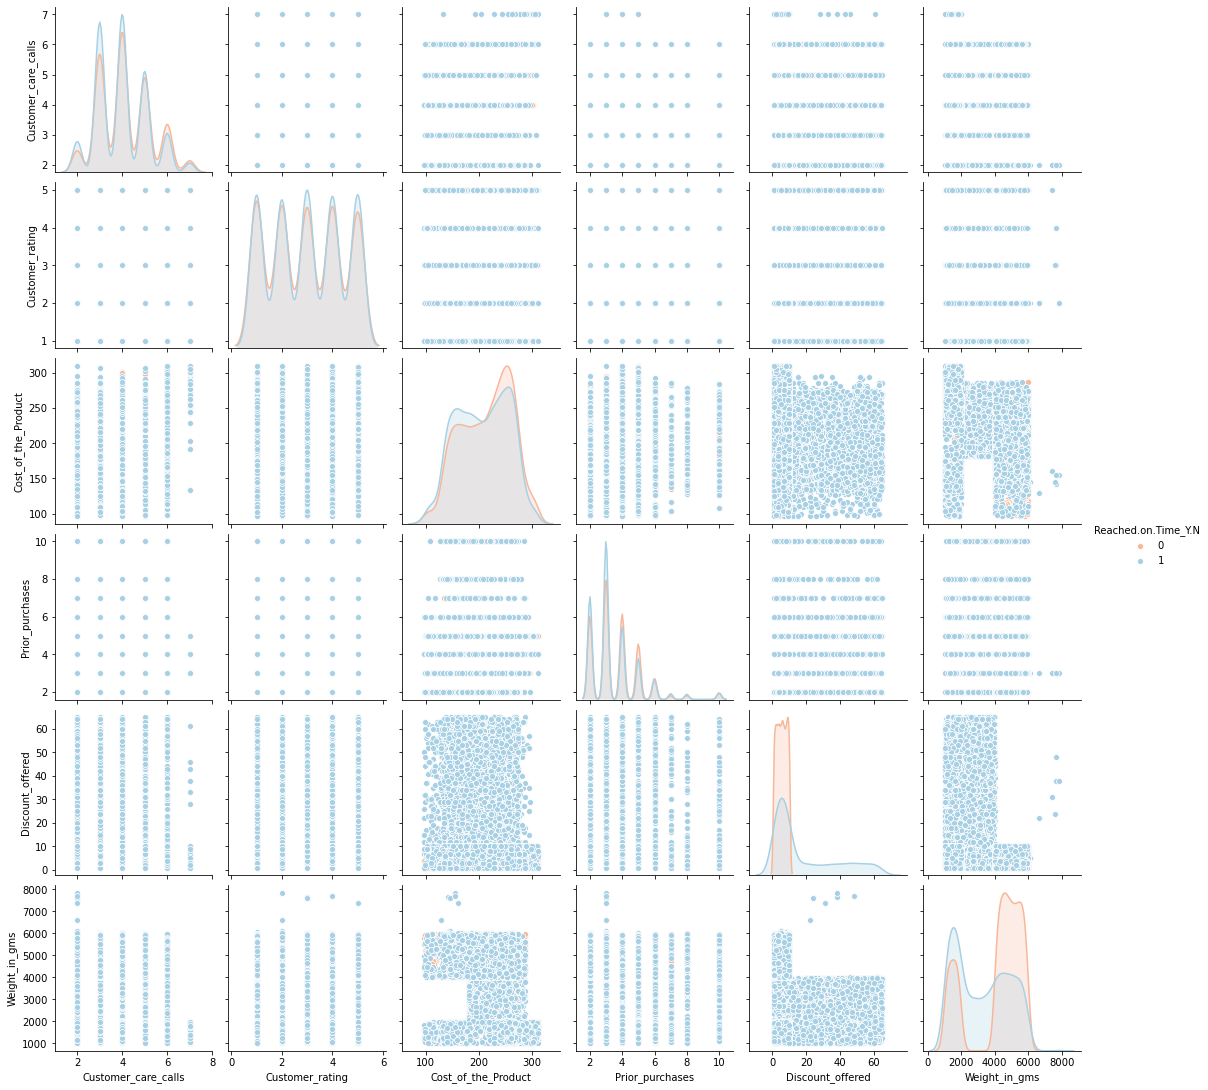

In [14]:
# Other way of visulization the correeltation with Reached on time to consider also Dicsount_Offered and Weighs 
sns.pairplot(data=data, hue = "Reached.on.Time_Y.N", palette = "RdBu")

Observations:
1- More Items not reached on time with discount_offered higher than 30 and weight more than 4000 gms.
2- Check the possible outliers with Weights and Dicount offered since it shows skewed distribution. 

# Pre-processing

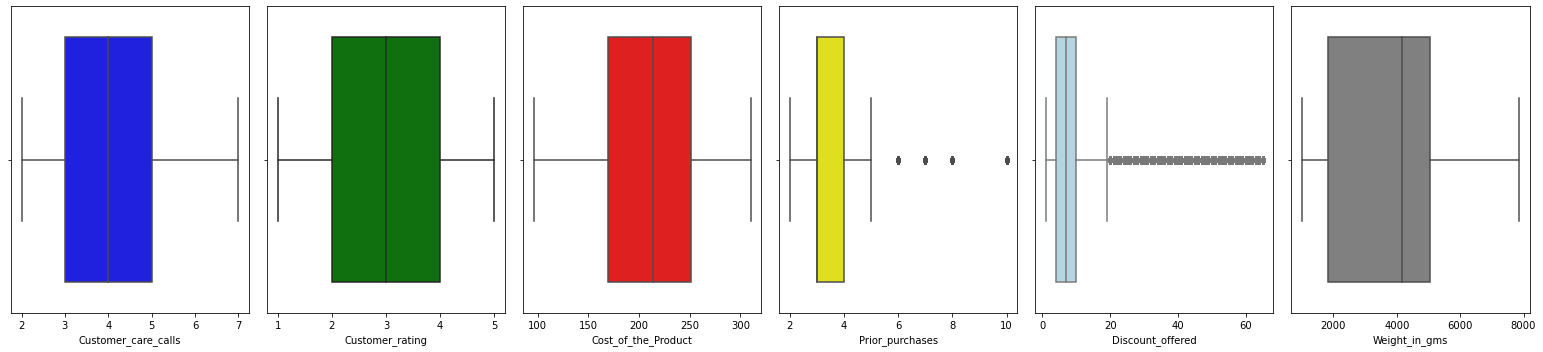

In [15]:
#Detecting outliers if any for the numerical data (not the cateogries)
numericData= data.select_dtypes(include=['number'])
plt.figure(figsize=(25,5))
for i,colour in zip(range(0, len(numericData.columns)),['blue', 'green', 'red', 'yellow','lightblue','gray']):
    plt.subplot(1,len(numericData.columns),i+1)
    sns.boxplot(numericData[numericData.columns[i]], color=colour)
    plt.tight_layout()

Observations:
The discount offered and Prior Purchases have outliers

In [16]:
# Outliers Treatment using fast_ml.outlier_treatment
ots = OutlierTreatment() 
ots.fit(data,["Discount_offered"])  
ots.fit(data,["Prior_purchases"])
data = ots.transform(data)
data

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                   D           Flight                    4                2   
1                   F           Flight                    4                5   
2                   A           Flight                    2                2   
3                   B           Flight                    3                3   
4                   C           Flight                    2                2   
...               ...              ...                  ...              ...   
10994               A             Ship                    4                1   
10995               B             Ship                    4                1   
10996               C             Ship                    5                4   
10997               F             Ship                    5                2   
10998               D             Ship                    2                5   

       Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                      177              3.0                low      F   
1                      216              2.0                low      M   
2                      183              4.0                low      M   
3                      176              4.0             medium      M   
4                      184              3.0             medium      F   
...                    ...              ...                ...    ...   
10994                  252              5.0             medium      F   
10995                  232              5.0             medium      F   
10996                  242              5.0                low      F   
10997                  223              5.5             medium      M   
10998                  155              5.0                low      F   

       Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                    44           1233                    1  
1                    59           3088                    1  
2                    48           3374                    1  
3                    10           1177                    1  
4                    46           2484                    1  
...                 ...            ...                  ...  
10994                 1           1538                    1  
10995                 6           1247                    0  
10996                 4           1155                    0  
10997                 2           1210                    0  
10998                 6           1639                    0  

[10999 rows x 11 columns]

In [17]:
#Normalization: convert categorical variable into numerical/indicator variables
encoder = LabelEncoder()
data['Mode_of_Shipment'] = encoder.fit_transform(data['Mode_of_Shipment'])
data['Product_importance'] = encoder.fit_transform(data['Product_importance'])
data['Warehouse_block'] = encoder.fit_transform(data['Warehouse_block'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data

Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0                    3                 0                    4   
1                    4                 0                    4   
2                    0                 0                    2   
3                    1                 0                    3   
4                    2                 0                    2   
...                ...               ...                  ...   
10994                0                 2                    4   
10995                1                 2                    4   
10996                2                 2                    5   
10997                4                 2                    5   
10998                3                 2                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177              3.0   
1                    5                  216              2.0   
2                    2                  183              4.0   
3                    3                  176              4.0   
4                    2                  184              3.0   
...                ...                  ...              ...   
10994                1                  252              5.0   
10995                1                  232              5.0   
10996                4                  242              5.0   
10997                2                  223              5.5   
10998                5                  155              5.0   

       Product_importance  Gender  Discount_offered  Weight_in_gms  \
0                       1       0                44           1233   
1                       1       1                59           3088   
2                       1       1                48           3374   
3                       2       1                10           1177   
4                       2       0                46           2484   
...                   ...     ...               ...            ...   
10994                   2       0                 1           1538   
10995                   2       0                 6           1247   
10996                   1       0                 4           1155   
10997                   2       1                 2           1210   
10998                   1       0                 6           1639   

       Reached.on.Time_Y.N  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
10994                    1  
10995                    0  
10996                    0  
10997                    0  
10998                    0  

[10999 rows x 11 columns]

# Features Correlation (Positive or Negative)

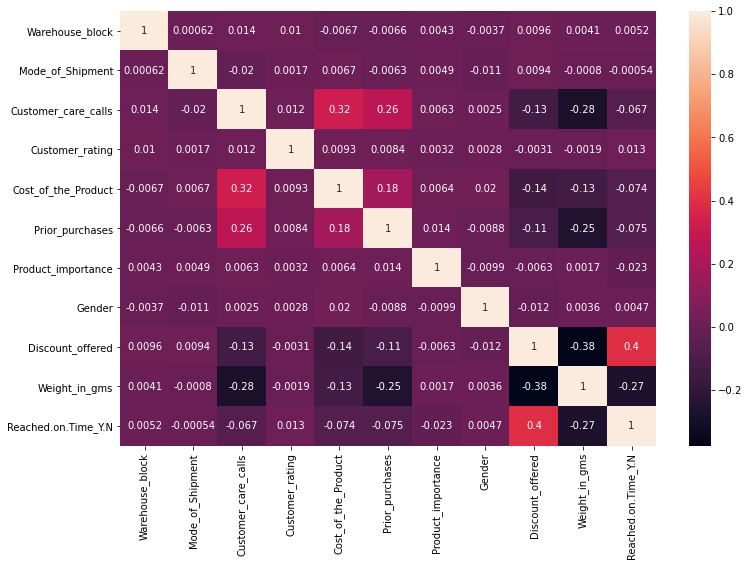

In [18]:
# present the correlation in clear way by showing the positive or negative correlation between attributes
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(),  annot = True)

Observations:

1- There is psoitive relation between Discount offered and Reached on time
2- There is slight positive relation between Reached on time and Gender, warehouse and customer rating
3- There is psoitive relation between Cost of product and Customer care Calls
4- There is a slight positive relation between prior purchase and customer care calls
5- There is a slight positive relation between Customer rating and customer care calls
6- There is negative relation between weights in gms and customer care calls
7- There is negative relation between weights in gms and discount offered.

# Features Scaling 

In [19]:
# Scaling each feature to a given range
# MinMaxScaler subtracts the minimum value in the feature and then divides by the range.
# The range is the difference between the original maximum and original minimum.
scaler = MinMaxScaler()
scaler.fit(data.drop('Reached.on.Time_Y.N',axis=1))
scaled_features = scaler.transform(data.drop('Reached.on.Time_Y.N',axis=1))
dataScale = pd.DataFrame(scaled_features,columns=data.columns[:-1])
dataScale.head()

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0             0.75               0.0                  0.4             0.25   
1             1.00               0.0                  0.4             1.00   
2             0.00               0.0                  0.0             0.25   
3             0.25               0.0                  0.2             0.50   
4             0.50               0.0                  0.0             0.25   

   Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
0             0.378505         0.285714                 0.5     0.0   
1             0.560748         0.000000                 0.5     1.0   
2             0.406542         0.571429                 0.5     1.0   
3             0.373832         0.571429                 1.0     1.0   
4             0.411215         0.285714                 1.0     0.0   

   Discount_offered  Weight_in_gms  
0          0.671875       0.033893  
1          0.906250       0.304894  
2          0.734375       0.346676  
3          0.140625       0.025712  
4          0.703125       0.216654

In [20]:
 def PlotRoc():
    plt.figure()
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0,1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0,1], [0,1], 'k--' )
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [21]:
# dataset for DecsisionTree analysis
dataDT=data #dataset for decision Tree
dataR=data #dataset for Research questions
dataN=data #dataset for Neural Network
dataC=data #dataset for Clustering

# Run Naïve Bayes Classifier 

In [22]:
# run the naive Bayes on data to predict the reached on time
#x= data.drop('Reached.on.Time_Y.N', axis=1)
x=dataScale
y = data['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.655


              precision    recall  f1-score   support

           0       0.54      0.99      0.70       895
           1       0.99      0.42      0.59      1305

    accuracy                           0.66      2200
   macro avg       0.76      0.71      0.65      2200
weighted avg       0.81      0.66      0.64      2200



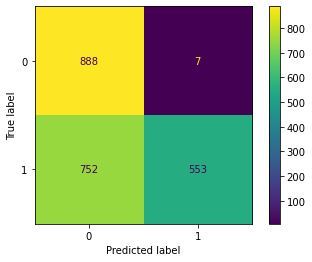

In [23]:
# Recording the major metrics
print(classification_report(y_test,y_pred))
#print(metrics.confusion_matrix(y_test, y_pred))
confusion_matrix = plot_confusion_matrix(nb, X_test, y_test)
#cm = metrics.confusion_matrix(y_test, y_pred)
#print('\nTrue Negatives(TP) = ', cm[0,0])
#print('\nTrue Positives(TN) = ', cm[1,1])
#print('\nFalse Positives(FP) = ', cm[0,1])
#print('\nFalse Negatives(FN) = ', cm[1,0])

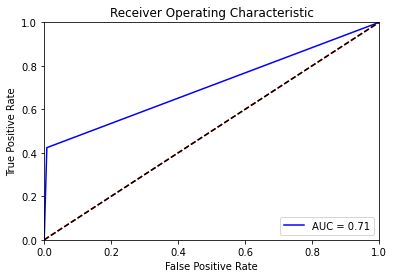

In [24]:
#ROC Curve
PlotRoc()

# Forming 3 Data Sets

Accuracy: 0.655
              precision    recall  f1-score   support

           0       0.54      0.99      0.70       895
           1       0.99      0.42      0.59      1305

    accuracy                           0.66      2200
   macro avg       0.76      0.71      0.65      2200
weighted avg       0.81      0.66      0.64      2200



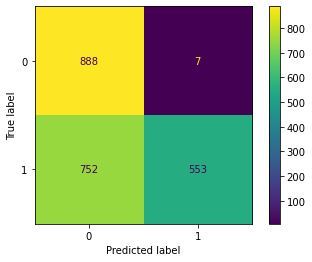

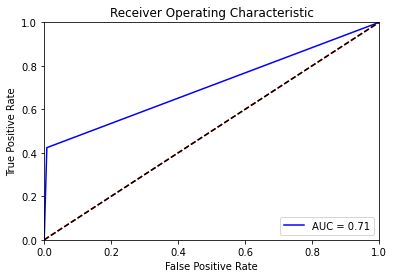

In [25]:
# DataSet 1 with 10 attributes

dataSet1=dataScale[["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", 
"Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Gender", "Discount_offered", "Weight_in_gms"]]
x=dataSet1
y = data['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix = plot_confusion_matrix(nb, X_test, y_test)
#ROC Curve
PlotRoc()

Accuracy: 0.6477272727272727
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       895
           1       1.00      0.41      0.58      1305

    accuracy                           0.65      2200
   macro avg       0.77      0.70      0.64      2200
weighted avg       0.81      0.65      0.63      2200



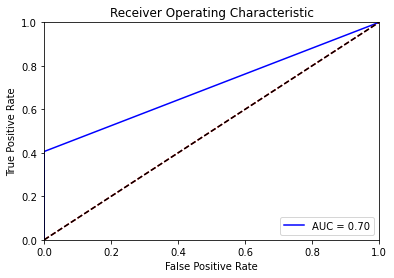

In [26]:
# DataSet 2 with 5 attributes

#dataSet2=dataScale[["Warehouse_block", "Mode_of_Shipment", "Customer_rating","Gender","Discount_offered"]]
dataSet2=dataScale[["Warehouse_block", "Mode_of_Shipment", "Discount_offered", "Customer_care_calls", "Product_importance"]]

x=dataSet2
y = data['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
#ROC Curve
PlotRoc()

Accuracy: 0.6472727272727272
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       895
           1       1.00      0.41      0.58      1305

    accuracy                           0.65      2200
   macro avg       0.77      0.70      0.64      2200
weighted avg       0.81      0.65      0.63      2200



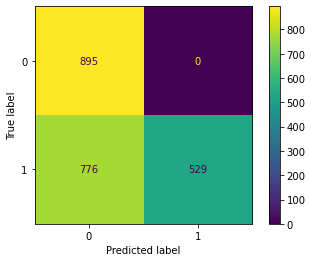

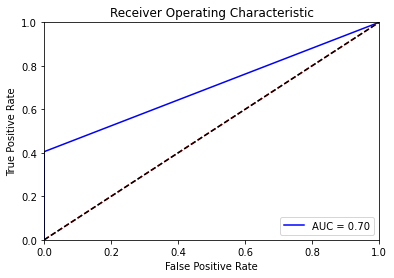

In [27]:
# DataSet3 with 2 attributes

#dataSet3=dataScale[[ "Customer_rating", "Discount_offered"]]
#"Warehouse_block", "Mode_of_Shipment", "Discount_offered", "Customer_care_calls", "Product_importance"
dataSet3=dataScale[[ "Warehouse_block", "Discount_offered"]]
x=dataSet3
y = data['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix = plot_confusion_matrix(nb, X_test, y_test)

#ROC Curve
PlotRoc()

Conclusions:

1- Dataset1 with all attributes (10 attributes) gives better accuracy of 65% which is better than other 2 datasets with 5 and 2 attributes which both gave accuracy around 64%. 
2- The AUC is better also for the first dataset with 0.71 which shows that the model is capable of distinguishing between classes(Reached on time or not) rather than the other 2 datasets with 0.70
3- F1 Score (model’s precision and recall) is better also for the first data set with the Reached on time (yes) class with 0.59 rather than 0.58 with the other 2 data sets.
4- Adding more features can enhance the model performance, such as customer address or location and courier.

# Run Other ML Classifier

In [28]:
# with train size 75%
x=dataScale
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
Models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier()
}
for name, model in Models.items():
    model.fit(X_train, y_train)
    print(name + ": {:1.2f}%".format(model.score(X_test, y_test) * 100))

Random Forest: 66.32%
Gradient Boosting: 68.50%
Logistic Regression: 63.73%
KNN: 63.77%
Decision Tree: 64.36%
Support Vector Machine (Linear Kernel): 64.36%
Support Vector Machine (RBF Kernel): 65.95%
Neural Network: 66.36%


Accuracy: 0.685
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       895
           1       0.86      0.56      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.74      0.69      0.68      2200



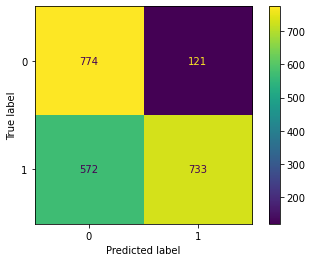

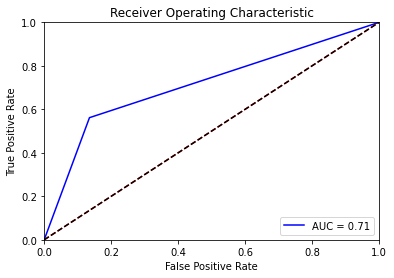

In [29]:
x=dataScale
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

model = GradientBoostingClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix = plot_confusion_matrix(model, X_test, y_test)

PlotRoc()

Optional: Summary for the other ML Models:
Gradiant Boosting is the best accuracy with 68.5% with 0.71 AUC, with the higher F1 score with 0.68 for Reached on time(yes) and less than the NB Gaussian with only 0.01 for reached on time (No) Class.

# Part 2: Clustering

The following Features will be used to perform the clustering:

Discount_offered and Cost_of_the_Product

The purpose of the analysis is to check if we are able to identify any specific groups of products purchased by Customers.

Text(0, 0.5, 'Discount_offered')

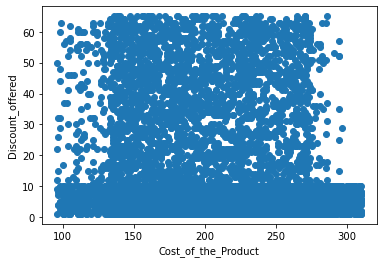

In [30]:
#Visulaize the 2 Features
plt.scatter(df["Cost_of_the_Product"],df['Discount_offered'])
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')

In [31]:
#Preprocessing using min max scaler
scaler = MinMaxScaler()
scaler.fit(df[['Discount_offered']])
df['Discount_offered'] = scaler.transform(df[['Discount_offered']])
scaler.fit(df[['Cost_of_the_Product']])
df['Cost_of_the_Product'] = scaler.transform(df[['Cost_of_the_Product']])
df[['Cost_of_the_Product','Discount_offered']].head()

Cost_of_the_Product  Discount_offered
0             0.378505          0.671875
1             0.560748          0.906250
2             0.406542          0.734375
3             0.373832          0.140625
4             0.411215          0.703125

1- Kmeans Clustering with K=2

In [32]:
km = KMeans(n_clusters=2,random_state=42) #n_initint, default=10
y_predicted = km.fit_predict(df[['Cost_of_the_Product','Discount_offered']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
km.cluster_centers_

array([[0.46124663, 0.70372438],
       [0.54877362, 0.08655075]])

In [34]:
df['cluster']=y_predicted
df[['Cost_of_the_Product','Discount_offered','cluster']].head()

Cost_of_the_Product  Discount_offered  cluster
0             0.378505          0.671875        0
1             0.560748          0.906250        0
2             0.406542          0.734375        0
3             0.373832          0.140625        1
4             0.411215          0.703125        0

Inertia of Kmeans with 2 Clusters:  648.4122815393595


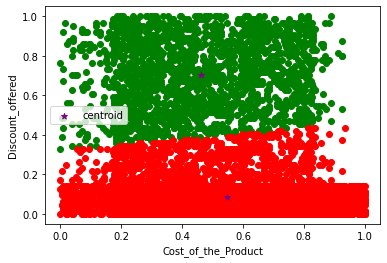

In [35]:
#Visualize Kmeans with 2 clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='green')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
df["Cost_of_the_Product"],df['Discount_offered']
print("Inertia of Kmeans with 2 Clusters: ", km.inertia_)

Inertia of Kmeans with 2 Clusters:  648.4129940715674


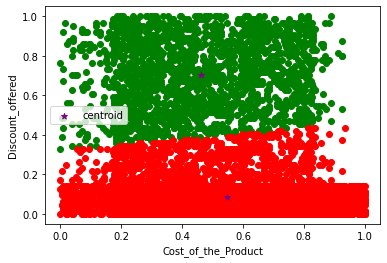

In [36]:
#Visualize the Kmeans 2 clusters with n_init =1
#n_initint
#Number of time the k-means algorithm will be run with different centroid seeds. 
#The final results will be the best output of n_init consecutive runs in terms of inertia.
km2 = KMeans(n_clusters=2,random_state=42, n_init=1) 
y_predicted = km2.fit_predict(df[['Cost_of_the_Product','Discount_offered']])
y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='green')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='red')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
df["Cost_of_the_Product"],df['Discount_offered']
print("Inertia of Kmeans with 2 Clusters: ", km2.inertia_)

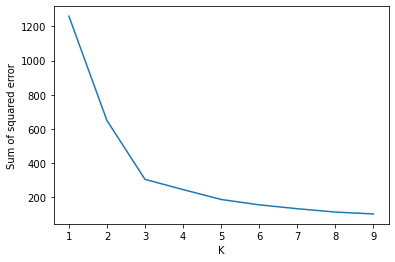

In [37]:
#Elbow Method

#Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE)
#between data points and their assigned clusters’ centroids. 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['Cost_of_the_Product','Discount_offered']])
    sse.append(km2.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

The graph above shows that k=3 is not a bad choice. Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out. 

That is why we will try K=3 in the coming analysis and check the results.

Inertia of Kmeans with 3 Clusters:  303.9348560999054


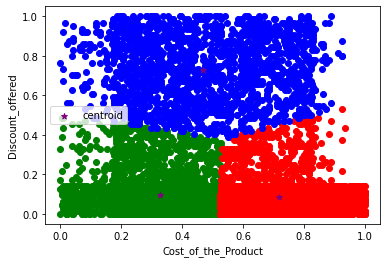

In [38]:
#Kmeans with K= 3 
km3 = KMeans(n_clusters=3,random_state=42)
y_predicted = km3.fit_predict(df[['Cost_of_the_Product','Discount_offered']])
df['cluster']=y_predicted

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='green')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='red')
plt.scatter(df3['Cost_of_the_Product'],df3['Discount_offered'],color='Blue')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
df["Cost_of_the_Product"],df['Discount_offered']
print("Inertia of Kmeans with 3 Clusters: ", km3.inertia_)

Inertia of Kmeans with 3 Clusters:  244.0657614334711


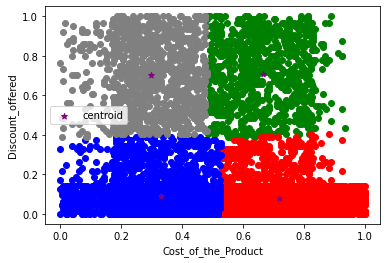

In [39]:
#Kmeans with K= 4
km4 = KMeans(n_clusters=4,random_state=42)
y_predicted = km4.fit_predict(df[['Cost_of_the_Product','Discount_offered']])
df['cluster']=y_predicted

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='green')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='red')
plt.scatter(df3['Cost_of_the_Product'],df3['Discount_offered'],color='Blue')
plt.scatter(df4['Cost_of_the_Product'],df4['Discount_offered'],color='gray')

plt.scatter(km4.cluster_centers_[:,0],km4.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
df["Cost_of_the_Product"],df['Discount_offered']
print("Inertia of Kmeans with 3 Clusters: ", km4.inertia_)

Kmeans Inertia and Score:

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric.

The score() method returns the negative inertia. Why negative? Well, it is because a predictor's score() method must always respect the "greater is better" rule.
As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [40]:
cluster_data=df[['Cost_of_the_Product','Discount_offered']]
print("Inertia of Kmeans with 2 Clusters: ", km2.inertia_)
print("Inertia of Kmeans with 3 Clusters: ", km3.inertia_)
print("Score of Kmeans with k=2 is ", km2.score(cluster_data))
print("Score of Kmeans with k=3 is ", km3.score(cluster_data))

Inertia of Kmeans with 2 Clusters:  101.48567036562858
Inertia of Kmeans with 3 Clusters:  303.9348560999054
Score of Kmeans with k=2 is  -101.48567036562858
Score of Kmeans with k=3 is  -303.9348560999054


low inertia is better than greater inertia so this shows that 3 cluster is better. However, we will use Silhouette score to further evaluate the quality of clusters created. 

Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:

The coefficient can take values in the interval [-1, 1].
If it is 0 –> the sample is very close to the neighboring clusters.
It it is 1 –> the sample is far away from the neighboring clusters.
It it is -1 –> the sample is assigned to the wrong clusters.

Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters

In [41]:
# Silhouette_score
sil_score_max = -1
best_n_clusters = 0
cluster_data=df[['Cost_of_the_Product','Discount_offered']]
for k in range(2,11):
  km = KMeans(n_clusters = k)
  labels = km.fit_predict(cluster_data)
  sil_score = silhouette_score(cluster_data, labels)
  print(f"The mean value of the silhouette score for {k} clusters is {sil_score}")
  if sil_score > sil_score_max:
    sil_score_max = sil_score
    best_n_clusters = k
    
print(f"The optimal number of clusters is: {best_n_clusters}")

The mean value of the silhouette score for 2 clusters is 0.5687248774861068
The mean value of the silhouette score for 3 clusters is 0.5374822046024332
The mean value of the silhouette score for 4 clusters is 0.5267189836520394
The mean value of the silhouette score for 5 clusters is 0.43884313627082683
The mean value of the silhouette score for 6 clusters is 0.44787929813881266
The mean value of the silhouette score for 7 clusters is 0.3929292660062447
The mean value of the silhouette score for 8 clusters is 0.40139225900886494
The mean value of the silhouette score for 9 clusters is 0.3643156512029373
The mean value of the silhouette score for 10 clusters is 0.3654851843333769
The optimal number of clusters is: 2


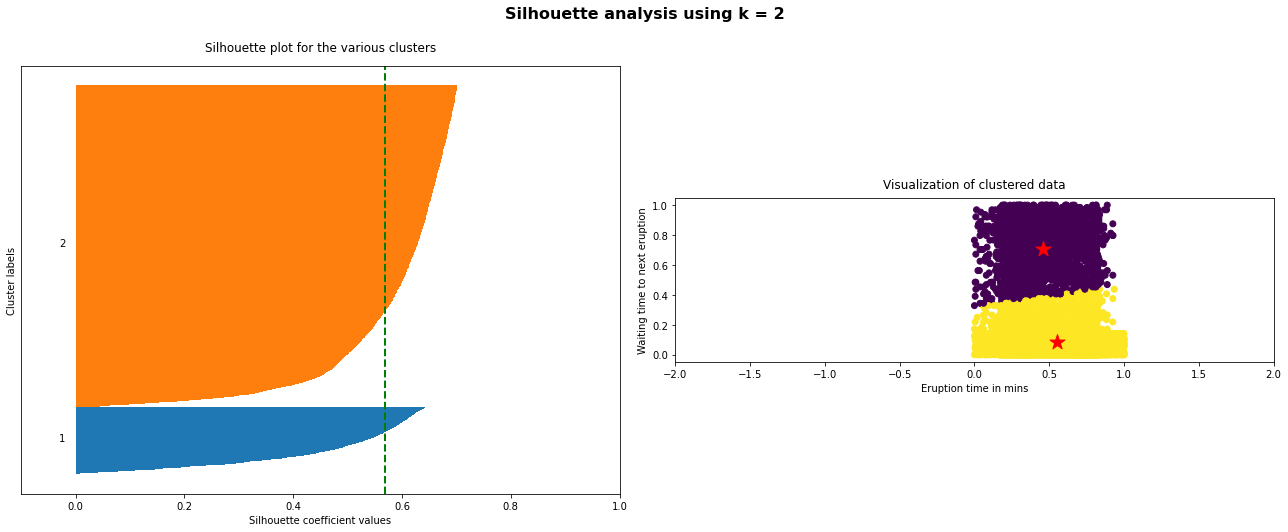

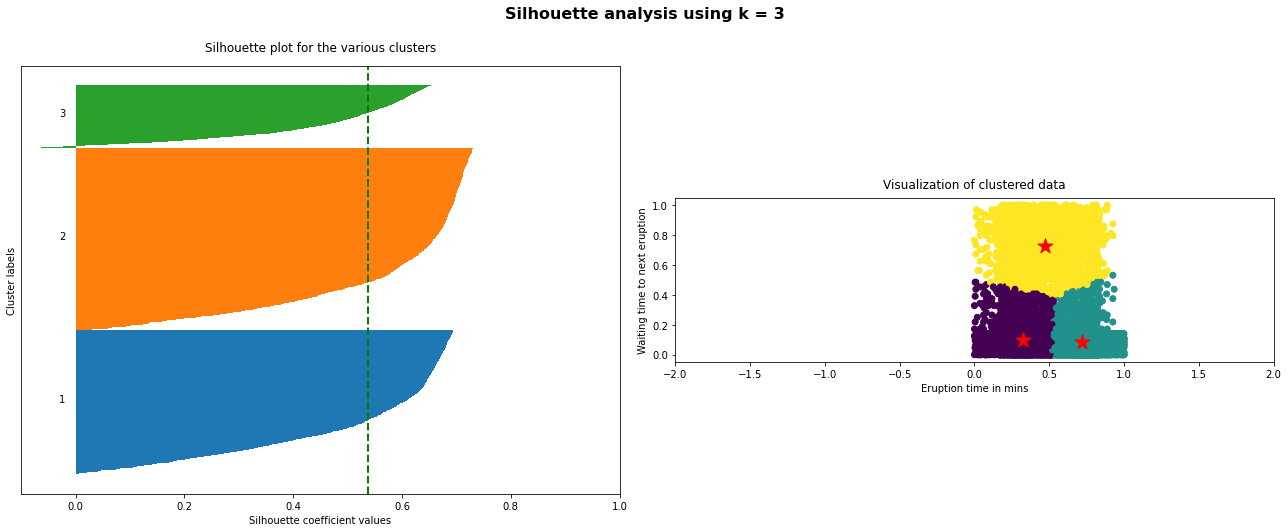

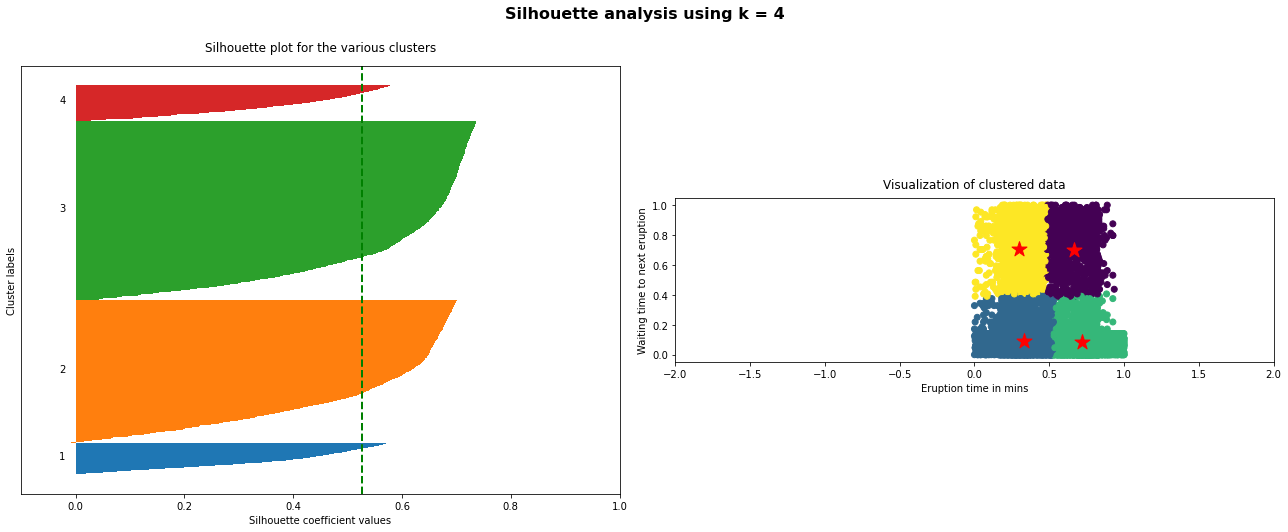

In [42]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(cluster_data)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(cluster_data, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
     # Scatter plot of data colored with labels
    ax2.scatter(cluster_data['Cost_of_the_Product'], cluster_data['Discount_offered'], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Conclusion:

Optimal number of clusters to choose is 2 with Silhoutte score 0.57

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping.

#Try to identify gender groups from Weight_in_gms and Cost_of_the_Product using Kmeans

In [43]:
cluster_data = data[["Weight_in_gms", "Gender", "Cost_of_the_Product"]]
cluster_model = KMeans(n_clusters = best_n_clusters)
# training the model
result = cluster_model.fit_predict(cluster_data)
labels = cluster_model.labels_
result_data = cluster_data.copy()
result_data["labels"] = labels
results_0 = cluster_data[result_data.labels == 0]
results_1 = cluster_data[result_data.labels == 1]

Weight_in_gms       Gender  Cost_of_the_Product
count    6597.000000  6597.000000           6597.00000
mean     4860.180991     0.499773            204.86600
std       681.370016     0.500038             43.86867
min      3330.000000     0.000000             96.00000
25%      4331.000000     0.000000            170.00000
50%      4875.000000     0.000000            206.00000
75%      5432.000000     1.000000            242.00000
max      7846.000000     1.000000            287.00000

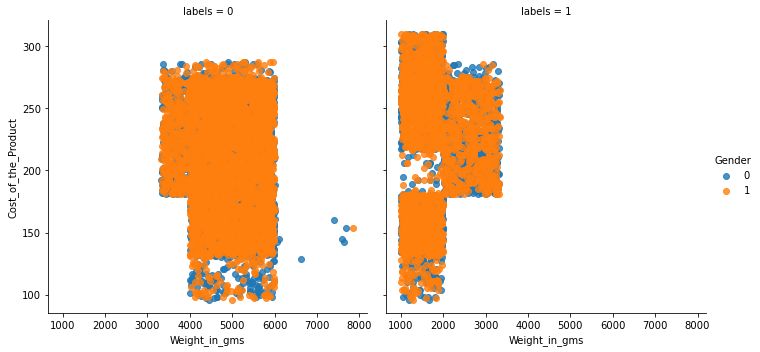

In [44]:
sns.lmplot("Weight_in_gms","Cost_of_the_Product",data=result_data,hue = 'Gender',col ='labels',fit_reg = False)
results_0.describe()

In [45]:
results_1.describe()

Weight_in_gms       Gender  Cost_of_the_Product
count    4402.000000  4402.000000          4402.000000
mean     1796.441617     0.490005           218.185825
std       597.046377     0.499957            52.745728
min      1001.000000     0.000000            96.000000
25%      1327.000000     0.000000           169.000000
50%      1678.000000     0.000000           230.000000
75%      2053.750000     1.000000           261.000000
max      3327.000000     1.000000           310.000000

Due to the uniform distribution of the attributes, the cluster study does not provide additional information because the Kmeans divide these sets into similar frames with a similar appearance. There is some slight differences for cost procust and weights between both clusters. Looking at the gender of consumers or the cost of products, it does not affect product groups.

2- Clustering using Gaussian Mixture.

GM implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models.
Gaussian Mixture Models are probabilistic models and use the soft clustering approach for distributing the points in different clusters.

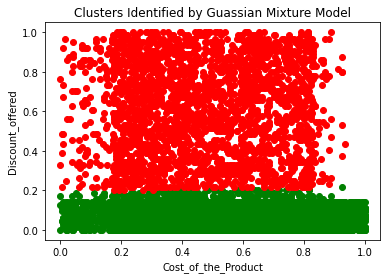

In [46]:
#GM with n_clusters = 2
cluster_data=df[['Cost_of_the_Product','Discount_offered']]

n_clusters = 2
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(cluster_data)
cluster_labels = gmm_model.predict(cluster_data)
df = pd.DataFrame(df)
df['cluster'] = cluster_labels
color=['Green','Red','Blue']
for k in range(0,n_clusters):
    data = df[df["cluster"]==k]
    plt.scatter(data["Cost_of_the_Product"],data["Discount_offered"],c=color[k])

plt.title("Clusters Identified by Guassian Mixture Model")    
plt.ylabel("Discount_offered")
plt.xlabel("Cost_of_the_Product")
plt.show()

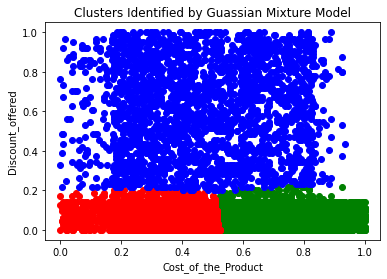

In [47]:
#GM with n_clusters = 3
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(cluster_data)
cluster_labels = gmm_model.predict(cluster_data)
df = pd.DataFrame(df)
df['cluster'] = cluster_labels
color=['Green','Red','Blue']
for k in range(0,n_clusters):
    dataC = df[df["cluster"]==k]
    plt.scatter(dataC["Cost_of_the_Product"],dataC["Discount_offered"],c=color[k])

plt.title("Clusters Identified by Guassian Mixture Model")    
plt.ylabel("Discount_offered")
plt.xlabel("Cost_of_the_Product")
plt.show()

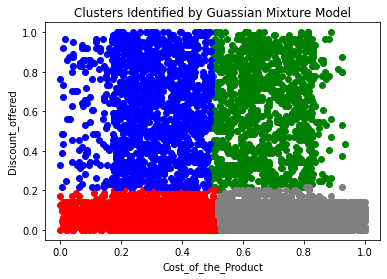

In [48]:
#GM with k=4
n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(cluster_data)
cluster_labels = gmm_model.predict(cluster_data)
df = pd.DataFrame(df)
df['cluster'] = cluster_labels
color=['Green','Red','Blue','Gray']
for k in range(0,n_clusters):
    dataC = df[df["cluster"]==k]
    plt.scatter(dataC["Cost_of_the_Product"],dataC["Discount_offered"],c=color[k])

plt.title("Clusters Identified by Guassian Mixture Model")    
plt.ylabel("Discount_offered")
plt.xlabel("Cost_of_the_Product")
plt.show()

Conclusion: 
When comparing the results between the Kmeans Cluster Analysis and the Gaussian Mixture, slight differences can be seen. The Kmeans analysis divided the data set mainly due to the means to update the centroid while GMM takes into account the mean as well as the variance of the data. 

Hence, the Gaussian is more realistic in this case as per the distribution of the data (Cost of the product and discount offered).

In Part 1 of Classification, we had to classes (Reached on time (Yes or No)) and predict this using calssifiers with accuracy reached to 68%. Difference from classification is that after cluster analysis we got 2 clusters that can be used to define, for example, (Shipment reached on time or not) or Gender groups of people (males or females) from the products purchased features (Cost of the product and Discount offered). From using Kmeans with Weight of the products and Cost of the product, it showed that we can not predict Gender from those two features. However, we can use the clusters that we created for other sales/marketing purposes. 

# Part 3: Decision Tree

Use Decision trees on a training set to predict the shipment being Reached on Time (Yes or No)

In [49]:
dataDT.head()

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                3                 0                    4                2   
1                4                 0                    4                5   
2                0                 0                    2                2   
3                1                 0                    3                3   
4                2                 0                    2                2   

   Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
0                  177              3.0                   1       0   
1                  216              2.0                   1       1   
2                  183              4.0                   1       1   
3                  176              4.0                   2       1   
4                  184              3.0                   2       0   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [50]:
#1 run Tree model 
tree_model = DecisionTreeClassifier(random_state=42)
x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
y = dataDT["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=42)
tree_model.fit(X_train, y_train)
print("Accuracy on Training data is ", tree_model.score(X_train, y_train) * 100)

Accuracy on Training data is  98.48032211975581


In [51]:
#10 Fold Cross Validation
accuracies = cross_val_score(estimator = tree_model, X=X_train, y=y_train, cv=10)
accuracies
print("10 Fold Cross Validation with Tree Model:",accuracies)
print("Mean Accuracy:",np.mean(accuracies))

10 Fold Cross Validation with Tree Model: [0.66623377 0.63246753 0.64415584 0.62207792 0.64935065 0.60779221
 0.62857143 0.64285714 0.64805195 0.63068921]
Mean Accuracy: 0.637224764832047


Conclusion: Since the Accuracy of training is larger than the cross Validation accuracies and the mean accuracy, this means that there is an overfitting. 

Accuracy on Training data: 98.48032211975581
Accuracy of the testing data: 65.0
              precision    recall  f1-score   support

           0       0.56      0.57      0.57      1312
           1       0.71      0.70      0.71      1988

    accuracy                           0.65      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300



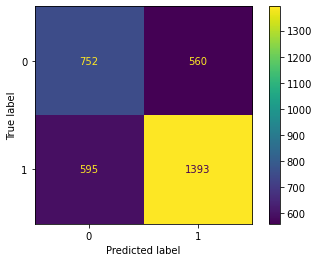

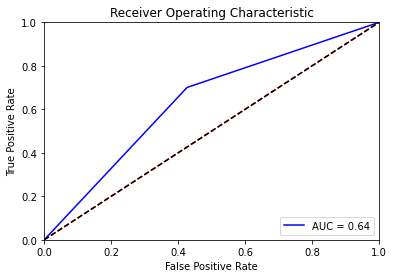

In [52]:
#2 Checking the model with training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=42)
y_pred = tree_model.predict(X_test)
print("Accuracy on Training data:", tree_model.score(X_train, y_train) * 100)
print("Accuracy of the testing data:",metrics.accuracy_score(y_test, y_pred)* 100)
print(classification_report(y_test,y_pred))
confusion_matrix = plot_confusion_matrix(tree_model, X_test, y_test)
PlotRoc()

Conclusion: 
The accuracy with the testing data set is 65% which means that there is overfitting with the testing data which is less than tha ccuracy of the training set.

To avoid overfitting the training data, we need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization.

Regularization hyperparameters for example can restrict the maximum depth of the Decision Tree. This is controlled by the max_depth hyperparameter (the default value is None, which means unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting.

Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model; resulting in a smaller tree & reduced overfitting

Other parameters that restrict the shape of the Decision Tree:

min_samples_split (the minimum number of sam‐ ples a node must have before it can be split)
min_samples_leaf (the minimum num‐ ber of samples a leaf node must have)
min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
max_leaf_nodes (maximum number of leaf nodes)
max_features (maximum number of features that are evaluated for splitting at each node).

In [53]:
#3 Experiment with various decision tree parameters that control the size of the tree
#Regularization Hyperparameters

# Max Depth 3
tree_model = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on Training data   :", tree_model.score(X_train, y_train) * 100)
print(f"The accuracy of the DT model: {100*acc:.2f}%")

Accuracy on Training data   : 67.17755552669178
The accuracy of the DT model: 67.00%


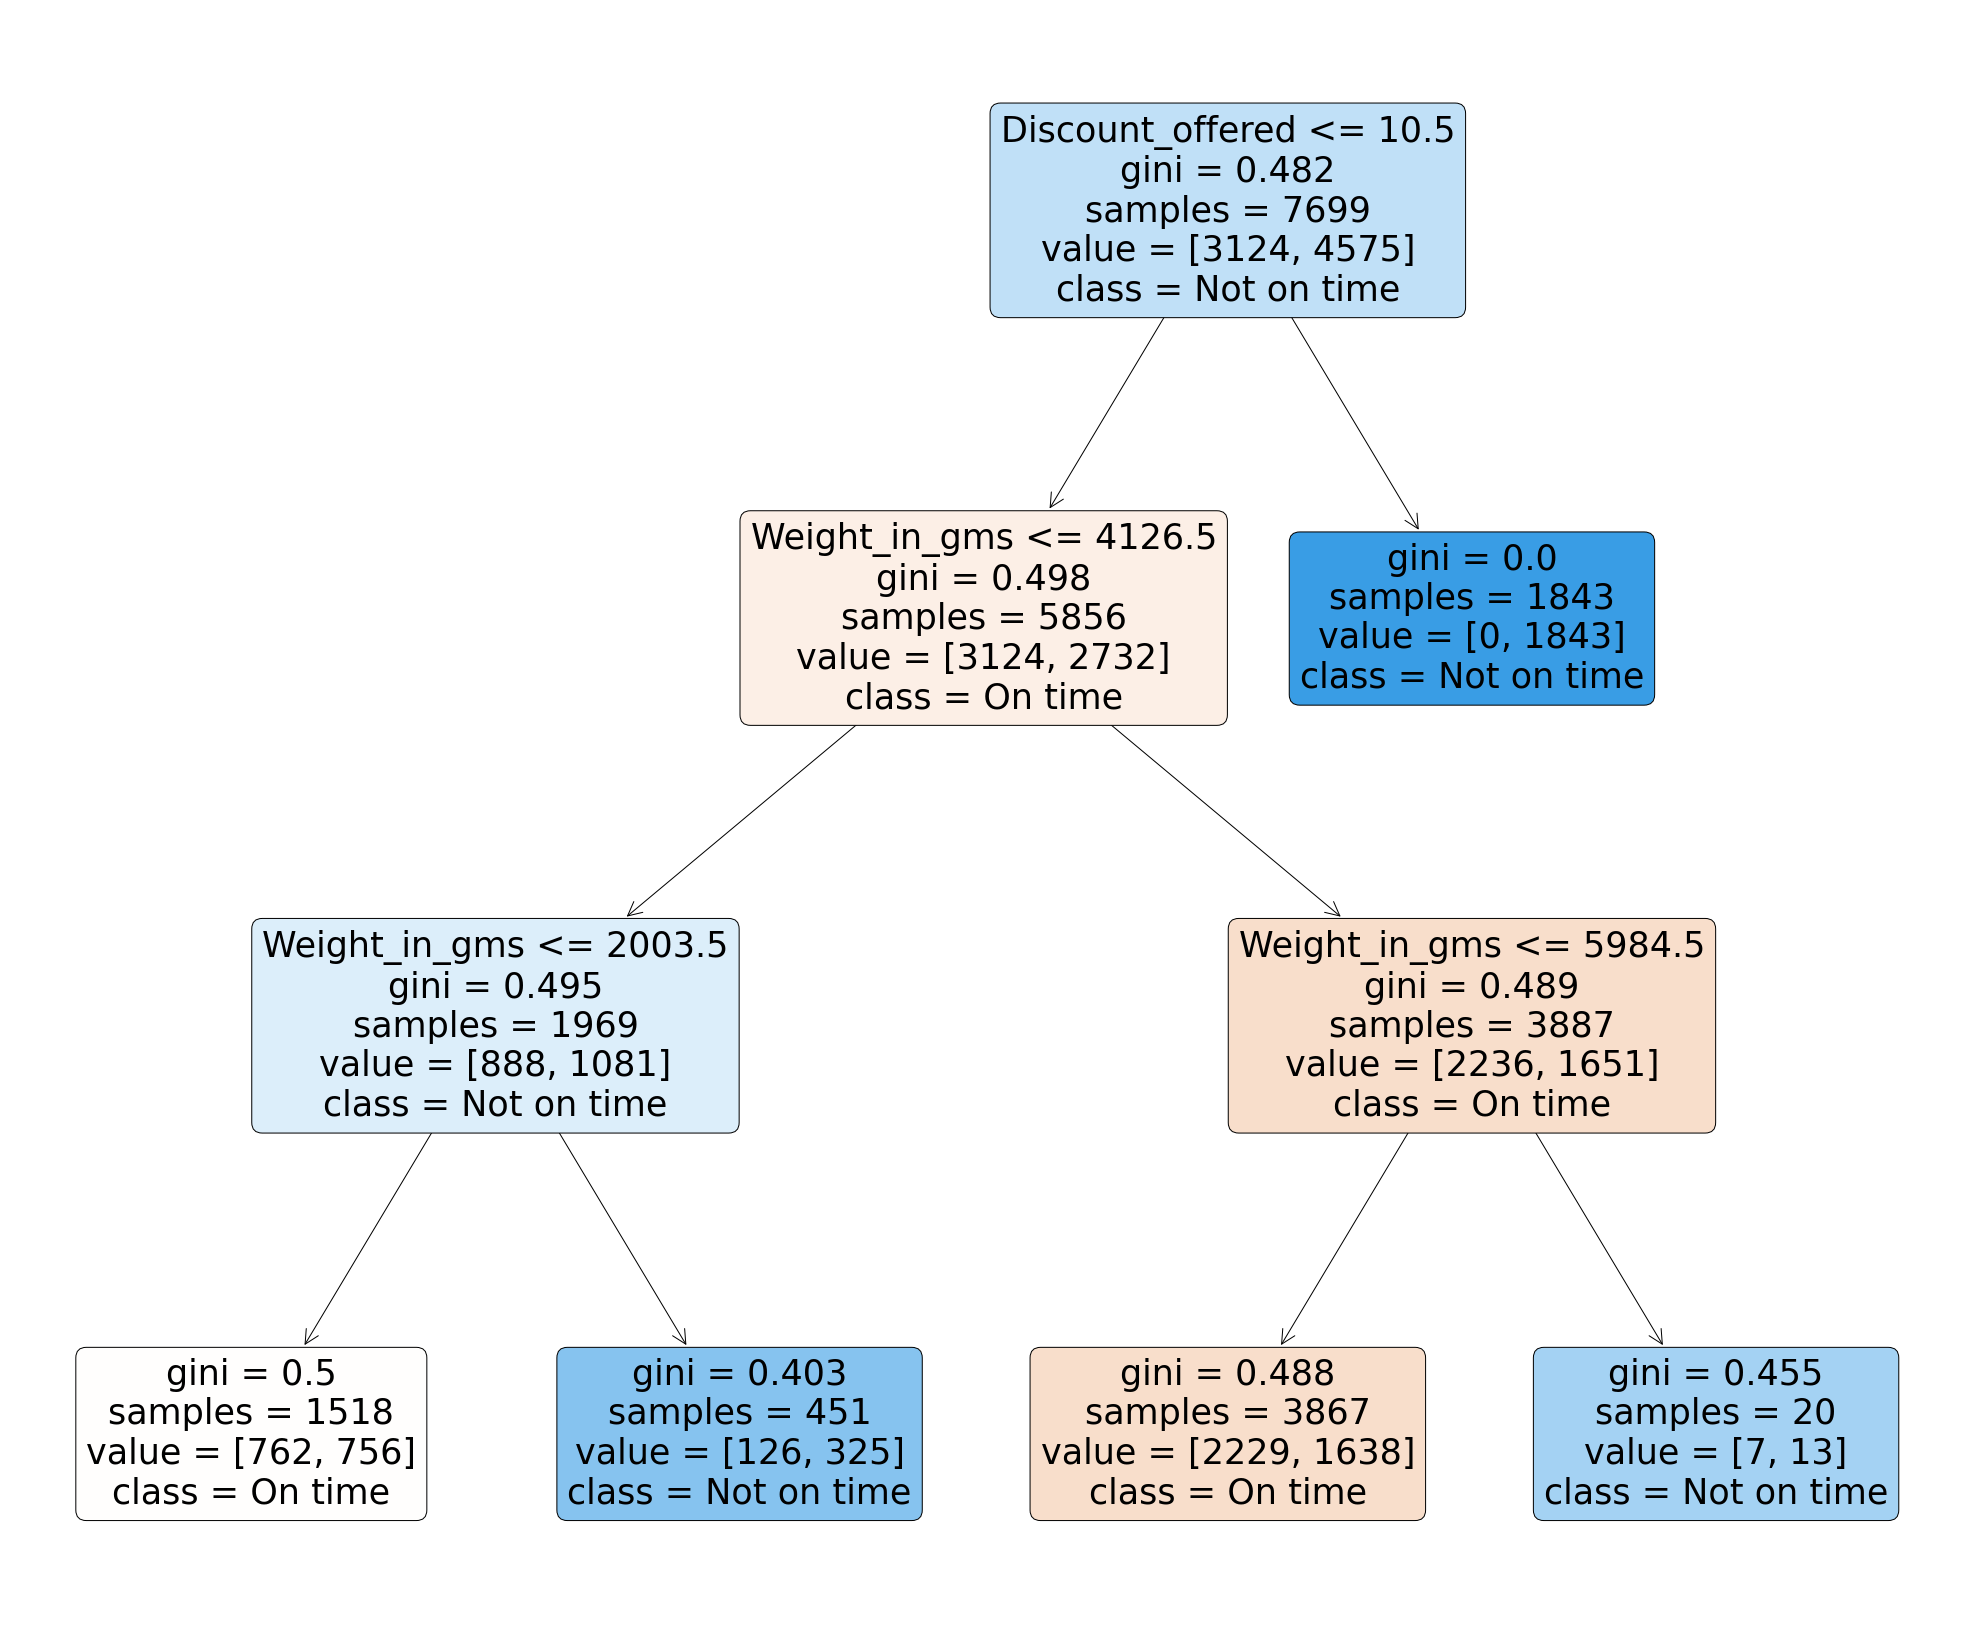

In [54]:
plt.figure(figsize=(35,30))
plot_tree(tree_model, filled=True, rounded=True, feature_names=X_train.columns, class_names=["On time","Not on time"])
plt.show()
#A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances 
#it applies to belong to the same class. 

In [55]:
# Max Depth 4
tree_model = DecisionTreeClassifier(max_depth=4,random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on Training data   :", tree_model.score(X_train, y_train) * 100)
print(f"The accuracy of the DT model for the testing data: {100*acc:.2f}%")

Accuracy on Training data   : 67.33341992466553
The accuracy of the DT model for the testing data: 66.94%


Conclusion: we got a good accuracy for the testing with max depth =3 and without overfitting. let us now check the other hyperparameters such as min samples leaf 

In [56]:
# min_samples_leaf
#checking the optimal accuracy of teting with min samples leaf

x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
y = dataDT["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
X_train
looprange= [200,225]

for f in range(200, 225):
    tree_model = DecisionTreeClassifier(min_samples_leaf=f, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    #print(f"The accuracy of the DT model with Min Samples Leaf=", f + " is {100*acc:.2f}%")
    #print("Min Samples Leaf=", f)
    #print(f"The accuracy of the DT model is {100*acc:.2f}%")
    print("The accuracy of the DT model with Min Samples Leaf=",  str(f) , f"is {100*acc:.2f}%")

The accuracy of the DT model with Min Samples Leaf= 200 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 201 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 202 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 203 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 204 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 205 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 206 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 207 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 208 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 209 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 210 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 211 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 212 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 213 is 66.67%
The accuracy of the DT model with Min Samples Leaf= 214 is 66.67%
The accura

In [57]:
# min_samples_leaf of 205 is good number to get high accuracy as the above figures
tree_model = DecisionTreeClassifier(min_samples_leaf=205,random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on Training data is", tree_model.score(X_train, y_train) * 100)
print(f"The accuracy of the DT model for the testing data is {100*acc:.2f}%")

Accuracy on Training data is 67.94388881672944
The accuracy of the DT model for the testing data is 66.67%


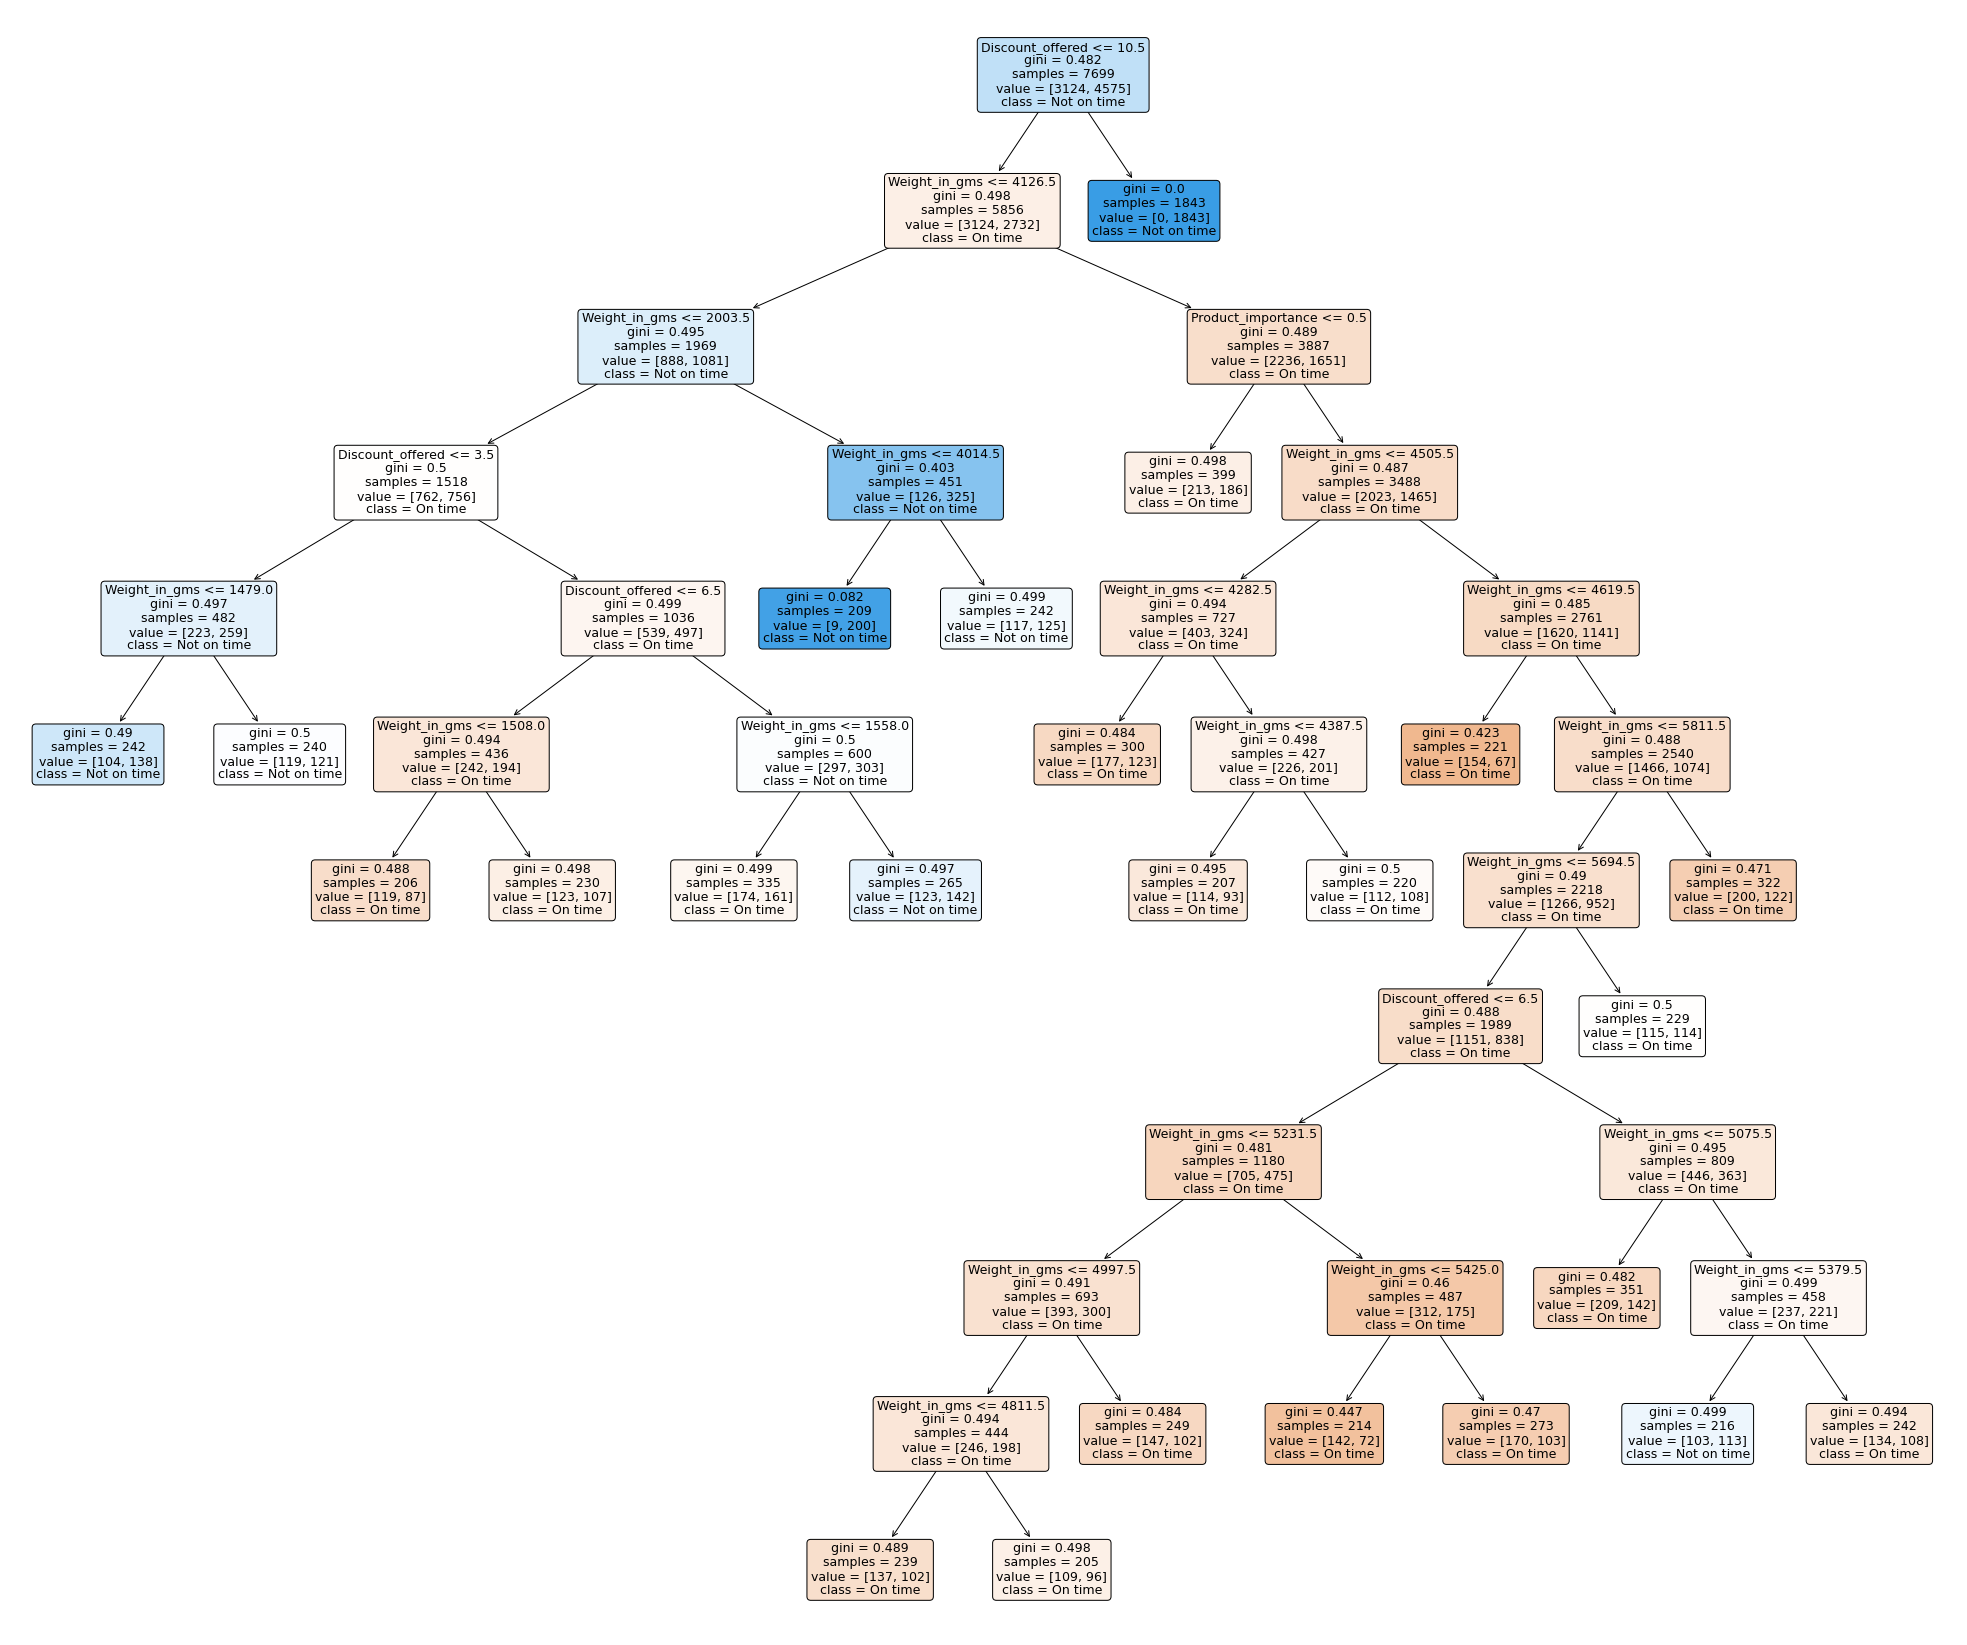

In [58]:
plt.figure(figsize=(35,30))
plot_tree(tree_model, filled=True, rounded=True, feature_names=X_train.columns, class_names=["On time","Not on time"])
plt.show()

Accuracy on Training data is 67.17755552669178
The accuracy of the DT model for the testing data is 67.00%


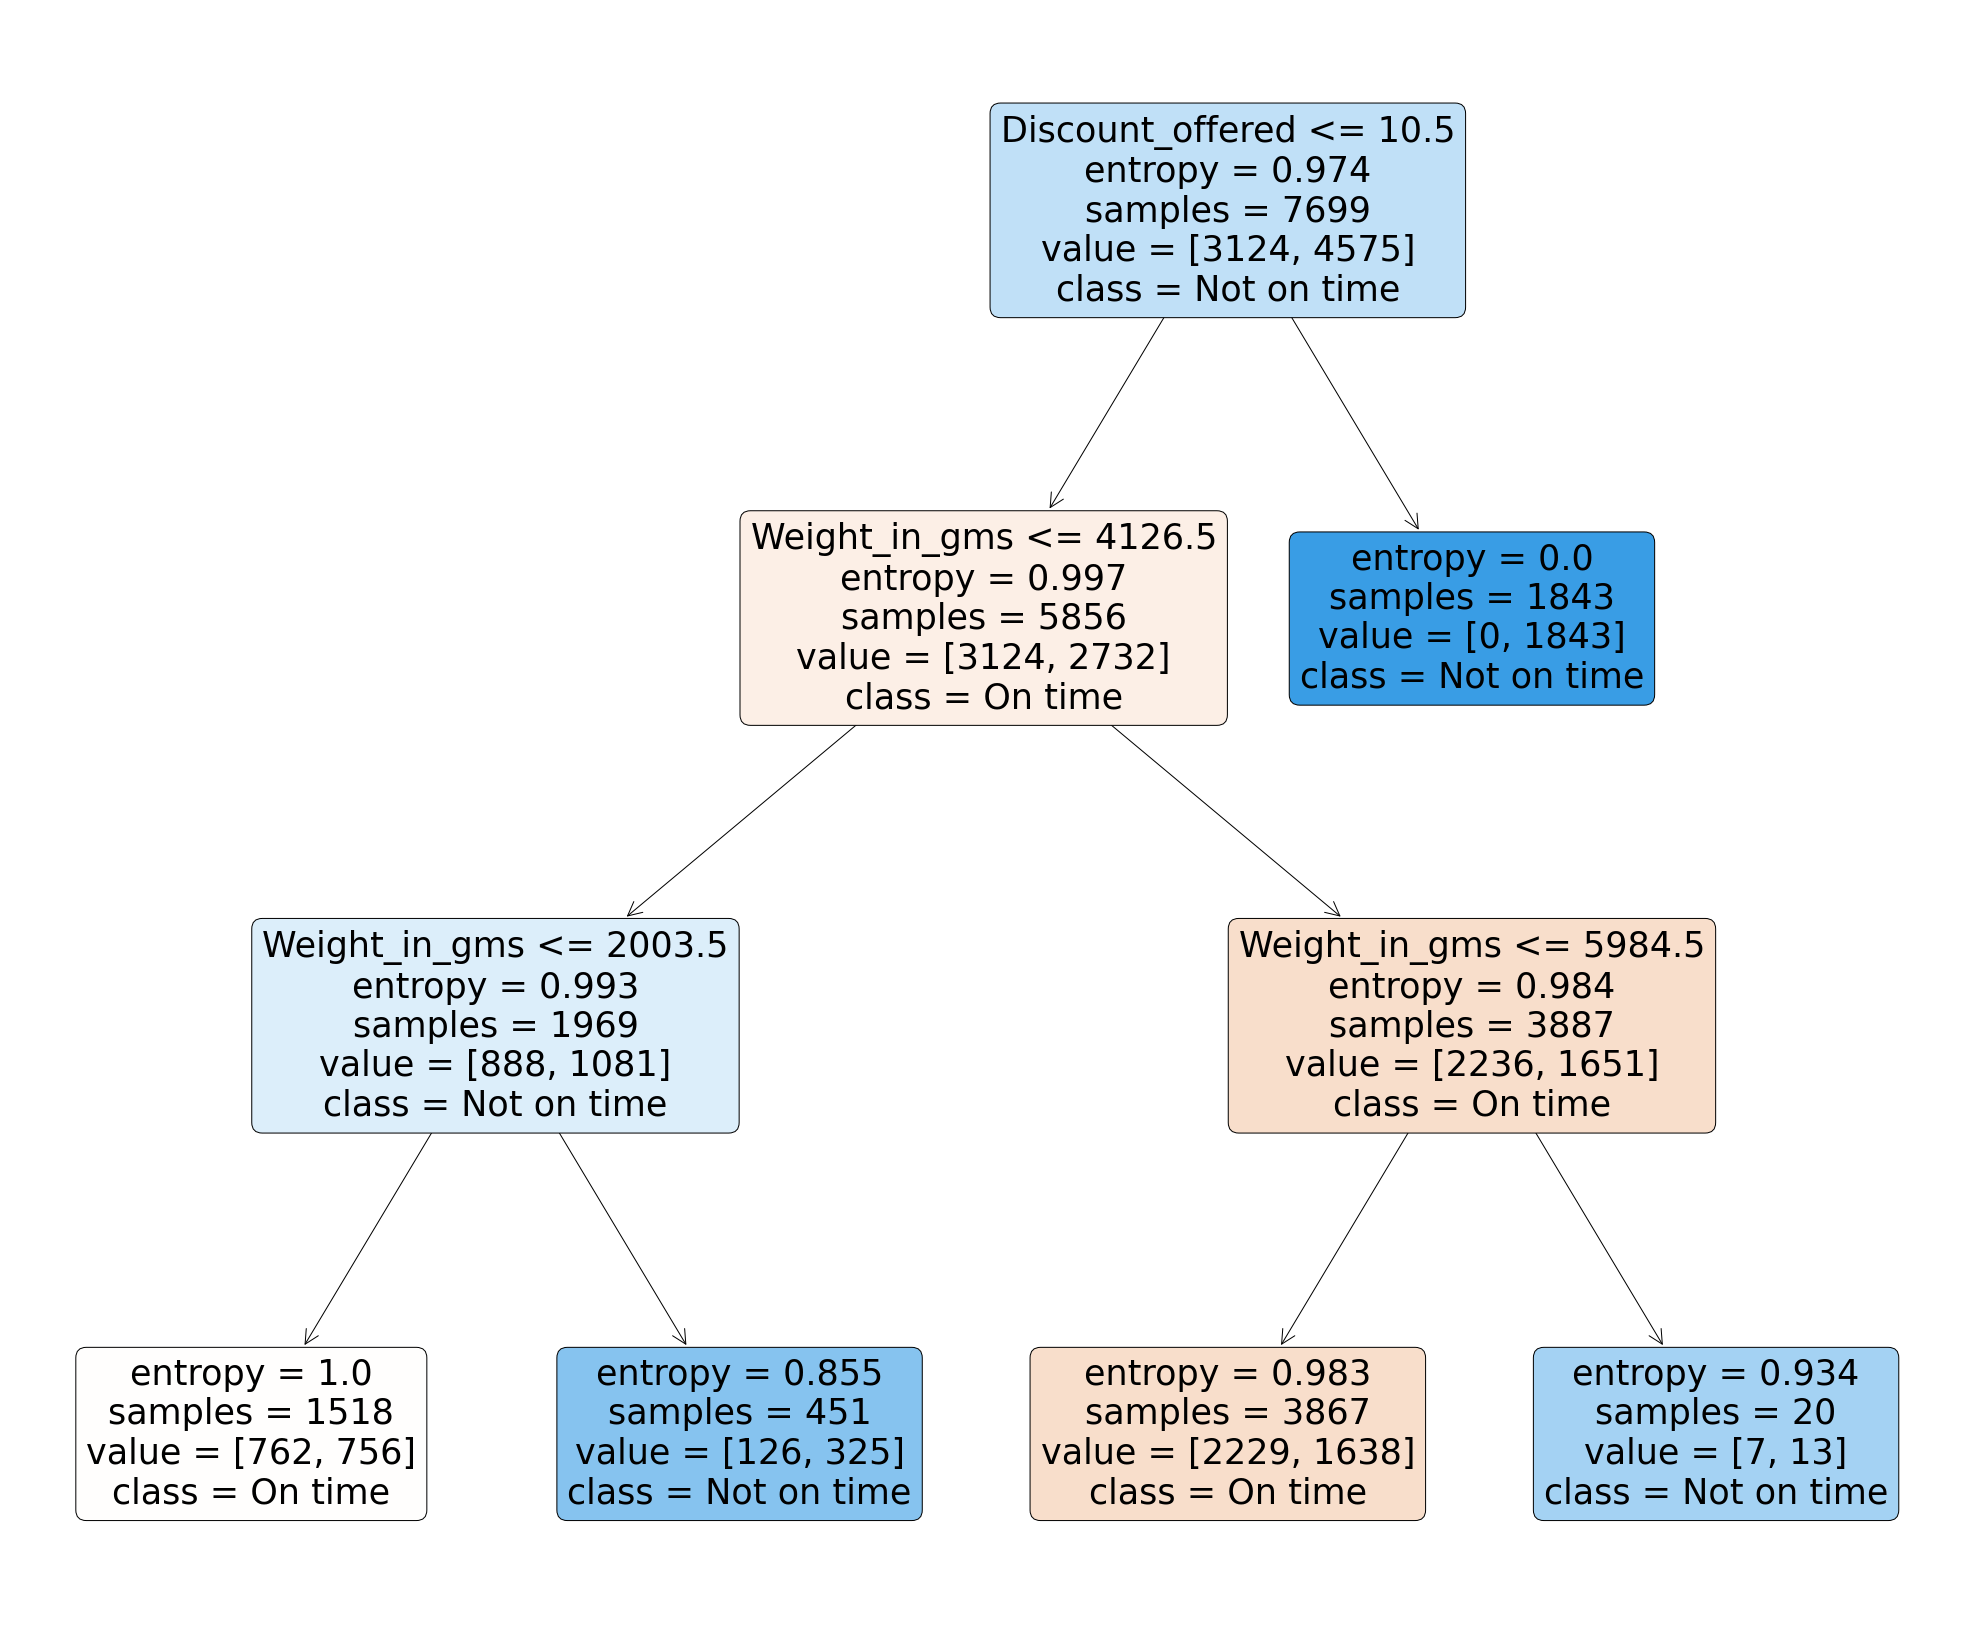

In [59]:
# Checking different parameters toegther 
tree_model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=205,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on Training data is", tree_model.score(X_train, y_train) * 100)
print(f"The accuracy of the DT model for the testing data is {100*acc:.2f}%")
plt.figure(figsize=(35,30))
plot_tree(tree_model, filled=True, rounded=True, feature_names=X_train.columns, class_names=["On time","Not on time"])
plt.show()

Accuracy on Training data is 67.33341992466553
The accuracy of the DT model for the testing data is 66.94%


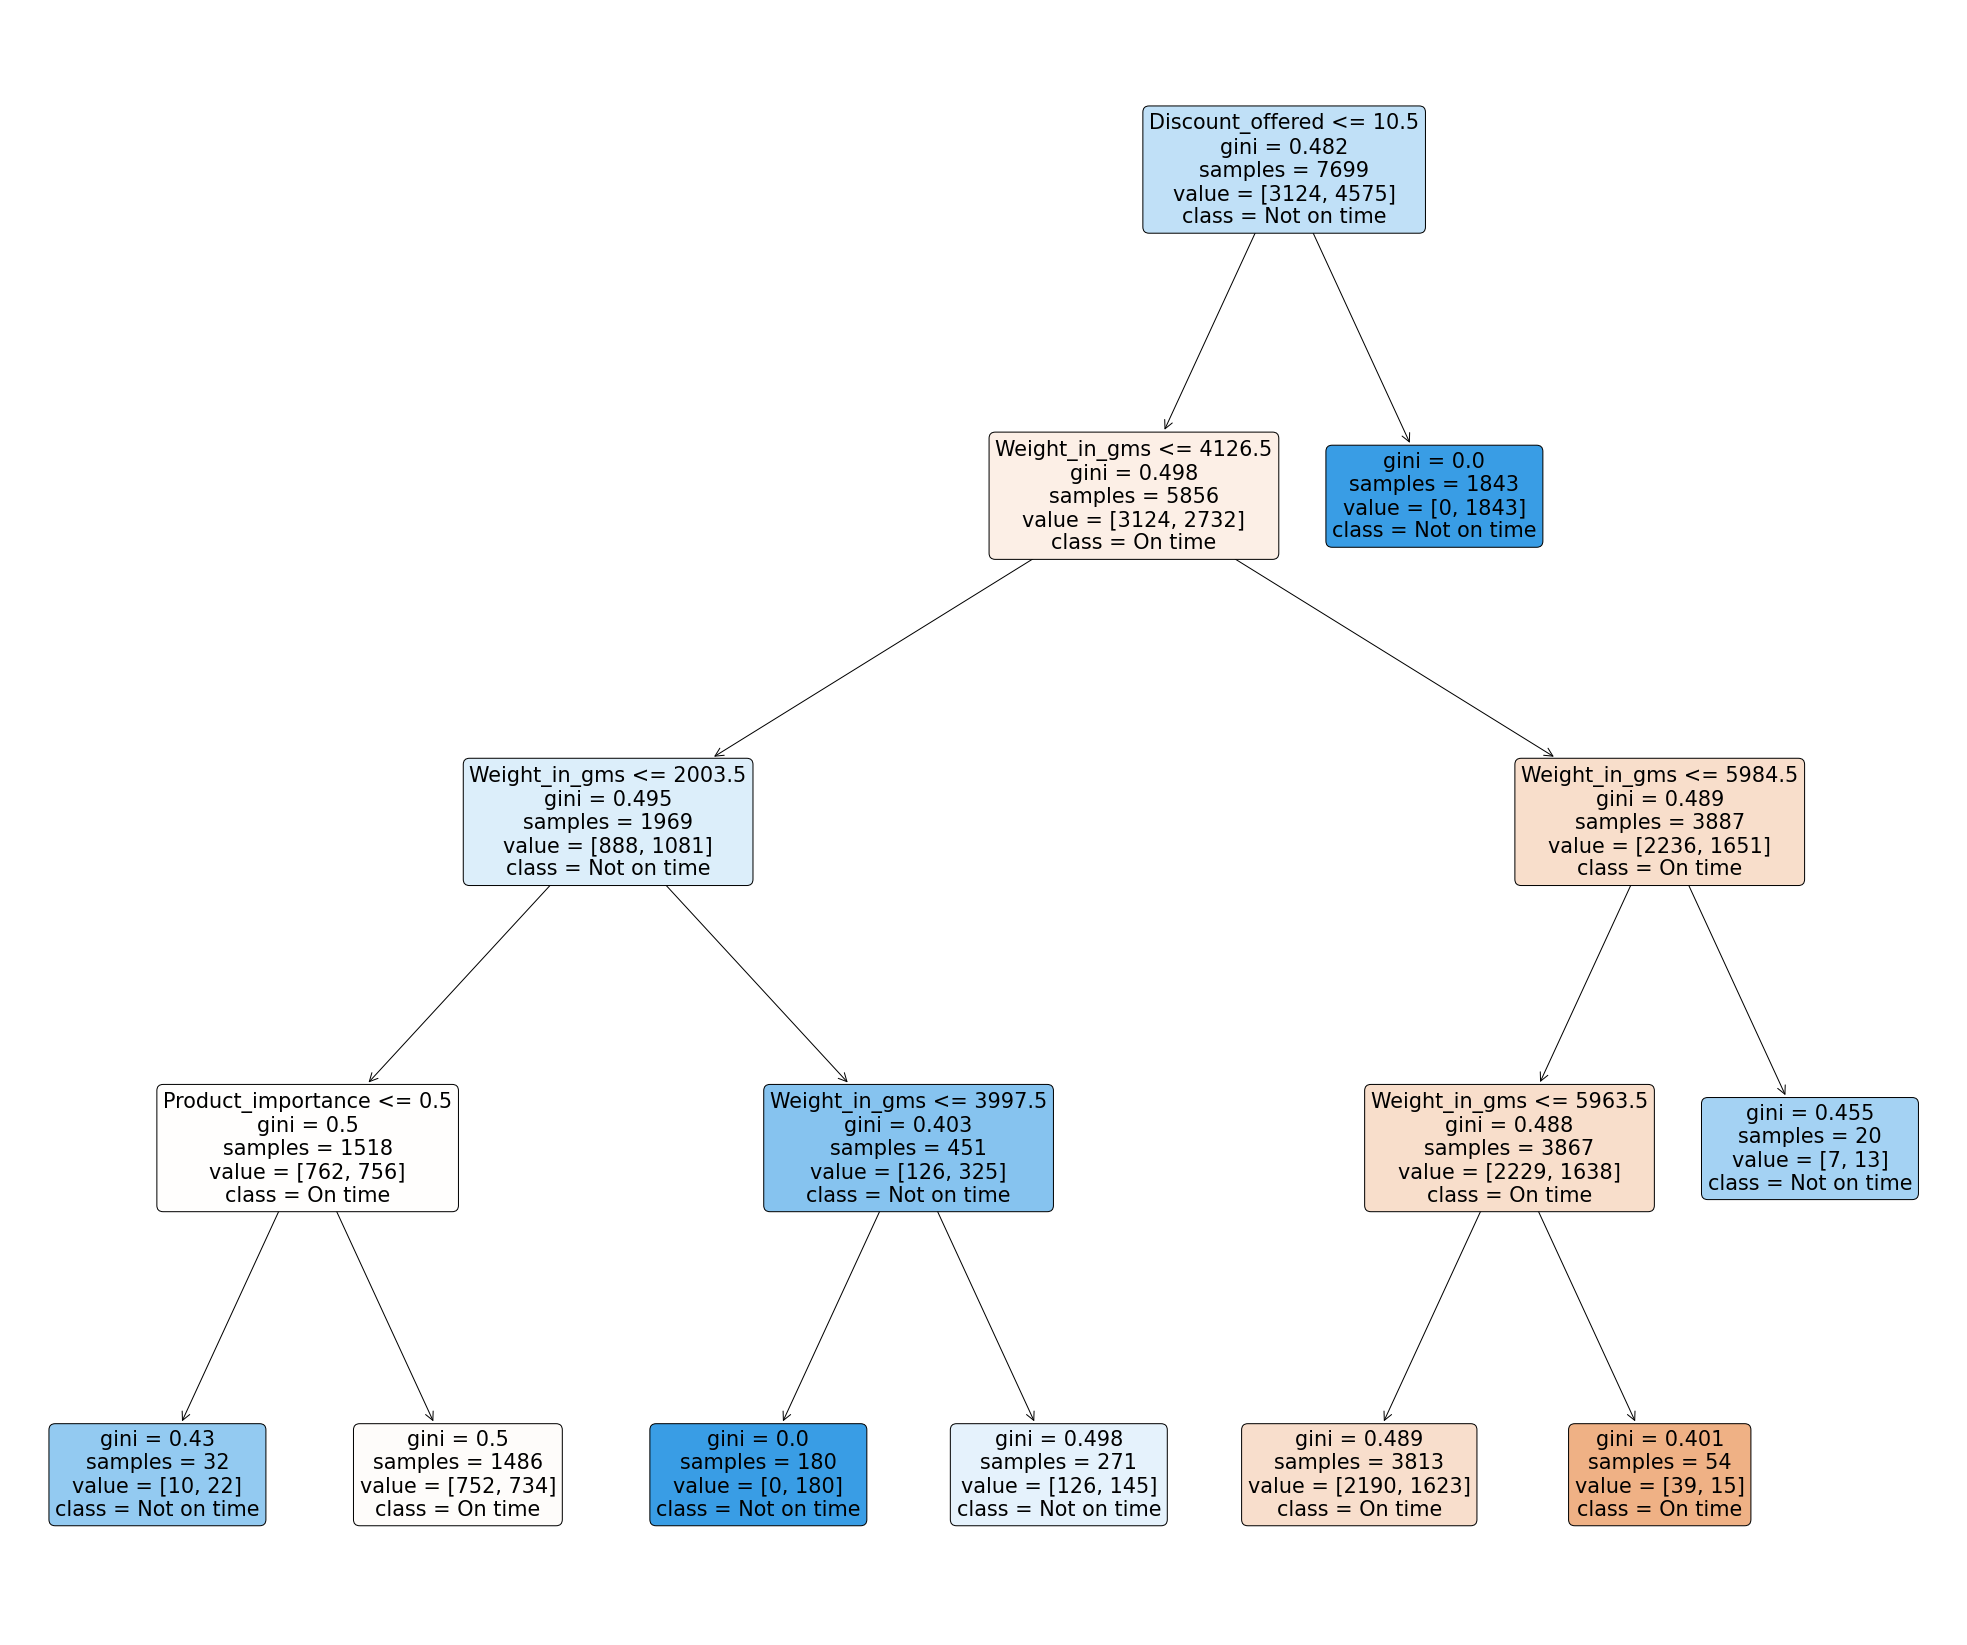

In [60]:
#trying other parameters toegther including the Entropy
## Entropy is zero when it contains instances of only one class (pure split)- maximum entropy
tree_model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=205,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on Training data is", tree_model.score(X_train, y_train) * 100)
print(f"The accuracy of the DT model for the testing data is {100*acc:.2f}%")
plt.figure(figsize=(35,30))
plot_tree(tree_model, filled=True, rounded=True, feature_names=X_train.columns, class_names=["On time","Not on time"])
plt.show()

In [61]:
#Checking the tree model for best accuracy
x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
tree_model = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("Accuracy of the testing data:",metrics.accuracy_score(y_test, y_pred)* 100)

Accuracy of the testing data: 68.13636363636364


Conclusion of influence on the classifier's performance with overfitting: 

1- Max Depth with 3 is good number to get high accuracy for the testing with with highe accuracy around 68% and in the same time with avoiding overfitting.

2- With Max depth of 4, it slightly decreases the accuracy

3-A node’s gini attribute measures its impurity:A Gini Index of 0.481 denotes equally distributed elements into both classes.

4- Shipments with more than 10.5 discount did not arrive on time. This could be because the company was giving discounts on delayed products. The greater the delay, the greater the discount.

#4 Make new training and testing sets, by moving 30% of the instances from the original training
set into the testing set.

In [62]:
# Moving 30% of the instances from the original training

x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
y = dataDT["Reached.on.Time_Y.N"]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.49, random_state=42)
X_train
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc_Train = tree_model.score(X_train, y_train)
print(f"The accuracy of the DT model with Training dataset is {100*acc_Train:.2f}%")
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy of the DT model with testing dataset is {100*acc:.2f}%")

The accuracy of the DT model with Training dataset is 98.87%
The accuracy of the DT model with testing dataset is 63.73%


In [63]:
#5 Moving 60% of the instances from the original training

x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
#x = dataDT[["Weight_in_gms", "Product_importance"]]
y = dataDT["Reached.on.Time_Y.N"]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.28, random_state=42)
X_train
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc_Train = tree_model.score(X_train, y_train)
print(f"The accuracy of the DT model with Training dataset is {100*acc_Train:.2f}%")
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy of the DT model with testing dataset is {100*acc:.2f}%")

The accuracy of the DT model with Training dataset is 99.19%
The accuracy of the DT model with testing dataset is 63.37%


Conclusion: 
The accuracy for the training set still the same for the above 2 training dataset, but the accuracy for the test decreased for both datasets which means there is an overfitting noticed. 

Hence we will use the max depth to avoid the overfitting with those 2 datasets as we did on the above analysis with Regularization Hyperparameters.

In [64]:
# Moving 30% of the instances from the original training with Max Depth=4

x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
y = dataDT["Reached.on.Time_Y.N"]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.49, random_state=42)
X_train
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc_Train = tree_model.score(X_train, y_train)
print(f"The accuracy of the DT model with Training dataset is {100*acc_Train:.2f}%")
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy of the DT model with testing dataset is {100*acc:.2f}%")

The accuracy of the DT model with Training dataset is 67.62%
The accuracy of the DT model with testing dataset is 67.38%


In [65]:
#5 Moving 60% of the instances from the original training with Max Depth=4

x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
#x = dataDT[["Weight_in_gms", "Product_importance"]]
y = dataDT["Reached.on.Time_Y.N"]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.28, random_state=42)
X_train
tree_model = DecisionTreeClassifier(max_depth=4,random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc_Train = tree_model.score(X_train, y_train)
print(f"The accuracy of the DT model with Training dataset is {100*acc_Train:.2f}%")
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy of the DT model with testing dataset is {100*acc:.2f}%")

The accuracy of the DT model with Training dataset is 68.43%
The accuracy of the DT model with testing dataset is 66.93%


We avoided the overfitting now as the above figures in both datasets with pruning the tree depth. The first dataset accuracy is slightly better with the testing dataset.

In [66]:
# Check the best accuracy without overfitting
x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
#x = dataDT[["Weight_in_gms", "Product_importance"]]
y = dataDT["Reached.on.Time_Y.N"]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
X_train

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on Training data   :", tree_model.score(X_train, y_train) * 100)
print(f"The accuracy of the DT model with testing dataset is: {100*acc:.2f}%")

Accuracy on Training data   : 67.17755552669178
The accuracy of the DT model with testing dataset is: 67.00%


Conclusion:
By analyzing the results of the decision tree prediction, we are able to confirm the hypothesis that whether Shipments were delivered on time depends on the features selected above.

The accuracy of the model was determined at the level of about 67% which is a very good result looking at the very weak relationships between the feaures. Taking into account the data provided, the results are satisfactory.

Decision trees are prone to overfit the data. Therefore, ensemble techniques such as random forest can be used because it have the capability to reduce variance without increasing the bias.

Run Random Forest

The accuracy of the RF model with Training dataset is 97.10%
Accuracy of the the RF model with testing data: 0.6415151515151515
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1312
           1       0.71      0.69      0.70      1988

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.64      0.64      3300



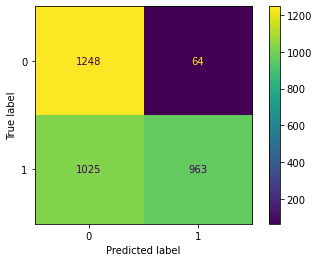

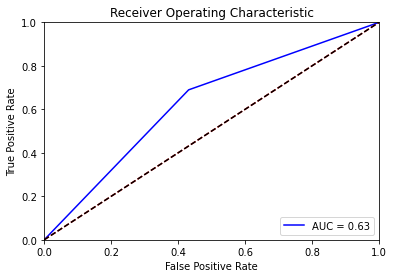

In [67]:
#6 Random Forest
x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
y = dataDT["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
RF_model = RandomForestClassifier( random_state=42, n_estimators=20)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
acc_Train = RF_model.score(X_train, y_train)
print(f"The accuracy of the RF model with Training dataset is {100*acc_Train:.2f}%")

print("Accuracy of the the RF model with testing data:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix = plot_confusion_matrix(tree_model, X_test, y_test)

#ROC Curve
PlotRoc()

There is an overfitting in the data as the the above figures, Hence we will prune the hyper Parameters

In [68]:
# examine different hyper parameters
x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
y = dataDT["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
RF_model = RandomForestClassifier( max_depth=20, min_samples_leaf=5,n_estimators=200)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
acc_Train = RF_model.score(X_train, y_train)
print(f"The accuracy of the RF model with Training dataset is {100*acc_Train:.2f}%")
print("Accuracy of Testing data:",metrics.accuracy_score(y_test, y_pred))

The accuracy of the RF model with Training dataset is 81.91%
Accuracy of Testing data: 0.6424242424242425


In [69]:
# examine different hyper parameters
x = dataDT[["Discount_offered", "Weight_in_gms", "Product_importance"]]
y = dataDT["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
RF_model = RandomForestClassifier( n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True, random_state=42, min_samples_split=210)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
acc_Train = RF_model.score(X_train, y_train)
print(f"The accuracy of the RF model with Training dataset is {100*acc_Train:.2f}%")
print("Accuracy of Testing data:",metrics.accuracy_score(y_test, y_pred))

The accuracy of the RF model with Training dataset is 67.85%
Accuracy of Testing data: 0.6790909090909091


Random Forest Conclusion: We avoided the overfitting with Random Forest and in the same time there is no much differnce between the accuracy of Tree model and Random Forest.

# Part 4. Neural Networks and Convolutional Neural Networks.

In [70]:
dataN.shape

(10999, 11)

In [71]:
dataN.head()

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                3                 0                    4                2   
1                4                 0                    4                5   
2                0                 0                    2                2   
3                1                 0                    3                3   
4                2                 0                    2                2   

   Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
0                  177              3.0                   1       0   
1                  216              2.0                   1       1   
2                  183              4.0                   1       1   
3                  176              4.0                   2       1   
4                  184              3.0                   2       0   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [72]:
# 1  Linear classifier with training dataset
x = dataScale[["Discount_offered", "Weight_in_gms", "Product_importance"]]
y = dataN["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
Per_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
Per_model.fit(X_train, y_train)
acc_Train = Per_model.score(X_train, y_train)
print(f"The accuracy of the Perceptron model with Training dataset is {100*acc_Train:.2f}%")

The accuracy of the Perceptron model with Training dataset is 62.90%


In [73]:
#10 Fold Cross Validation
accuracies = cross_val_score(estimator = Per_model, X=X_train, y=y_train, cv=10)
accuracies
print("10 Fold Cross Validation with Tree Model:",accuracies)
print("Mean Accuracy:",np.mean(accuracies))

10 Fold Cross Validation with Tree Model: [0.64675325 0.58571429 0.5961039  0.59480519 0.55194805 0.54805195
 0.61168831 0.61688312 0.62467532 0.59427828]
Mean Accuracy: 0.5970901660108422


Accuracy on Training data: 62.68894192521878
Accuracy of the testing data: 62.909090909090914
              precision    recall  f1-score   support

           0       0.52      0.95      0.68       895
           1       0.92      0.41      0.57      1305

    accuracy                           0.63      2200
   macro avg       0.72      0.68      0.62      2200
weighted avg       0.76      0.63      0.61      2200



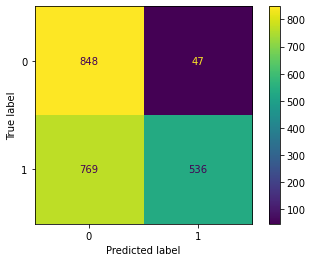

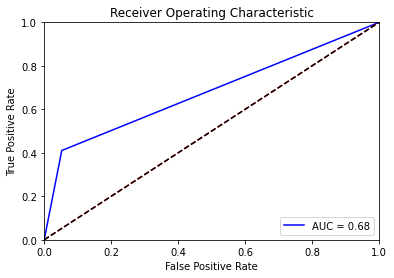

In [74]:
#2 Checking the model with training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
y_pred = Per_model.predict(X_test)
print("Accuracy on Training data:", Per_model.score(X_train, y_train) * 100)
print("Accuracy of the testing data:",metrics.accuracy_score(y_test, y_pred)* 100)
print(classification_report(y_test,y_pred))
confusion_matrix = plot_confusion_matrix(Per_model, X_test, y_test)
PlotRoc()

Conclusion:

Since the accuracy of the test data is almost the same like acuuracy iof the training data, we can say that the linear classifier does genrealize to the new data.

The lower accuracy of the training dataset show that there is no overfiting.

The lower accuracy of the testing dataset shows that this is a strong evidence that this data is not linearly separable with a high confidence.

In [75]:
#2 Run the Multilayer Perceptron
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
mlp = MLPClassifier().fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Accuracy on Training data:", mlp.score(X_train, y_train) * 100)
print("Accuracy of the testing data:",metrics.accuracy_score(y_test, y_pred)* 100)

Accuracy on Training data: 66.82577565632458
Accuracy of the testing data: 67.22727272727272


In [76]:
# MLP with Cross validation
mlpc = MLPClassifier().fit(X_train,y_train)
predict = mlpc.predict(X_test)
R2CV = cross_val_score(mlpc,X_test,y_test,cv=10).mean()
print("Cross Validation Score: ",R2CV)
error = -cross_val_score(mlpc,X_test,y_test,cv=10,scoring="neg_mean_squared_error").mean()
print("Mean Squared Error: ",np.sqrt(error))

Cross Validation Score:  0.6645454545454544
Mean Squared Error:  0.5787918451395112


The mlp generealize to the new data since the accuracy of tratining and testing data are without much difference.

The lower accuracy of the testing dataset shows that this is a strong evidence that this data is not linearly separable with a high confidence.

#Experiment with various Neural Network parameters

Hidden_layer_sizes : This parameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple. Thus the length of tuple denotes the total number of hidden layers in the network.

Max_iter: It denotes the number of epochs.

Activation: The activation function for the hidden layers.

Solver: This parameter specifies the algorithm for weight optimization across the nodes.

Random_state: The parameter allows to set a seed for reproducing the same results

Momentum: for gradient descent update

Learning Rate: schedule for weight updates.

An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large). Some people use the term iteration loosely and refer to putting one batch through the model as an iteration. 

An activation function is a function that is added into an artificial neural network in order to help the network learn complex patterns in the data. When comparing with a neuron-based model that is in our brains, the activation function is at the end deciding what is to be fired to the next neuron. 

In [77]:
#Experiment with various Neural Network parameters with Multilayer Perceptron 
    
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
#print("Accuracy on Training data:", mlp.score(X_train, y_train) * 100)
print("Accuracy of the testing data:",metrics.accuracy_score(y_test, y_pred)* 100)
print(classification_report(y_test,y_pred))

Accuracy of the testing data: 65.13636363636364
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       895
           1       0.72      0.68      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.66      0.65      0.65      2200



In [78]:
#Initializing the MLPClassifier : hidden_layer_sizes=(150,100,50)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=42)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Accuracy of the MLPClassifier:",metrics.accuracy_score(y_test, y_pred)* 100)

Accuracy of the MLPClassifier: 67.95454545454545


In [79]:
#Experiment different parameters together 
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', alpha=0.0001,
 batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
 max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
 momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9,
 beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Accuracy of the MLPClassifier:",metrics.accuracy_score(y_test, y_pred)* 100)

Accuracy of the MLPClassifier: 67.81818181818183


In [80]:
#Experiment with various Neural Network parameters with Multilayer Perceptron 
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=200, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001, momentum=0.9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.67016201
Iteration 2, loss = 0.66775717
Iteration 3, loss = 0.66553715
Iteration 4, loss = 0.66340850
Iteration 5, loss = 0.66126752
Iteration 6, loss = 0.65918275
Iteration 7, loss = 0.65713520
Iteration 8, loss = 0.65514566
Iteration 9, loss = 0.65298684
Iteration 10, loss = 0.65076140
Iteration 11, loss = 0.64841864
Iteration 12, loss = 0.64599104
Iteration 13, loss = 0.64340299
Iteration 14, loss = 0.64068815
Iteration 15, loss = 0.63777855
Iteration 16, loss = 0.63470022
Iteration 17, loss = 0.63150747
Iteration 18, loss = 0.62824742
Iteration 19, loss = 0.62495872
Iteration 20, loss = 0.62161102
Iteration 21, loss = 0.61819405
Iteration 22, loss = 0.61471655
Iteration 23, loss = 0.61127442
Iteration 24, loss = 0.60780911
Iteration 25, loss = 0.60435573
Iteration 26, loss = 0.60098390
Iteration 27, loss = 0.59778694
Iteration 28, loss = 0.59468943
Iteration 29, loss = 0.59171473
Iteration 30, loss = 0.58896895
Iteration 31, loss = 0.58639964
Iteration 32, los

In [81]:
print("Accuracy of the testing data:",metrics.accuracy_score(y_test, y_pred)* 100)
#Loss is the quantitative measure of deviation or difference between the predicted output
#and the actual output in anticipation. It gives us the measure of mistakes made by the network in predicting the output.

#loss decreases as the iteration increases but it keep the same with around 0.53 from 127 iteration to 200

Accuracy of the testing data: 66.45454545454545


In [82]:
# Activation function =  identity
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(150,150,100), max_iter=1000,
                    activation = 'identity',solver='adam',random_state=42, alpha=1)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Accuracy of the MLPClassifier:",metrics.accuracy_score(y_test, y_pred)* 100)

Accuracy of the MLPClassifier: 63.40909090909091


In [83]:
# Activation function =  tanh
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(150,150,100), max_iter=1000,
                    activation = 'tanh',solver='adam',random_state=42, alpha=1)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Accuracy of the MLPClassifier:",metrics.accuracy_score(y_test, y_pred)* 100)

Accuracy of the MLPClassifier: 63.54545454545455


In [84]:
# Activation function =  relu
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(150,150,100), max_iter=1000,
                    activation = 'relu',solver='adam',random_state=42, alpha=1)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Accuracy of the MLPClassifier:",metrics.accuracy_score(y_test, y_pred)* 100)

Accuracy of the MLPClassifier: 66.13636363636364


In [85]:
# Activation function =  logistic
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(150,150,100), max_iter=1000,
                    activation = 'logistic',solver='adam',random_state=42, alpha=1)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Accuracy of the MLPClassifier:",metrics.accuracy_score(y_test, y_pred)* 100)

Accuracy of the MLPClassifier: 59.31818181818181


In [86]:
# Learning rate = adaptive or  invscaling
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(150,150,100), max_iter=1000,
                    activation = 'logistic',solver='adam',random_state=42, alpha=1, learning_rate='adaptive')
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Accuracy of the MLPClassifier:",metrics.accuracy_score(y_test, y_pred)* 100)

Accuracy of the MLPClassifier: 59.31818181818181


In [87]:
# Tuning the model for best accuracy: 
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=200,activation = 'relu',solver='adam',random_state=42)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Accuracy of the MLPClassifier:",metrics.accuracy_score(y_test, y_pred)* 100)

Accuracy of the MLPClassifier: 67.95454545454545


Conculsion: No diference on the accuracy with different learning rates types.

Hence, the best accuracy is 67.95% as the above analysis with experminent different parameters.

In [88]:
#3 Convolutional Neural networks Keras Sequential

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

model = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(10, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="relu"),
    layers.Dense(2, activation="softmax")
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


The network was built with the term Adam optimizer, which implements an exponential moving average of the gradients to scale the training rate. Maintains an exponentially declining average of previous gradients. Adam is computationally efficient and has very low memory requirements.

Adam Optimizer is one of the most popular gradient descent optimization algorithms. In addition to the optimizer, sparse_categorical_crossentropy was selected as a cost function, and the accuracy parameter was chosen for network quality measurements.

Epoch 1/20
220/220 [==============================] - 1s 2ms/step - loss: 0.6648 - accuracy: 0.5867 - val_loss: 0.6267 - val_accuracy: 0.6023
Epoch 2/20
220/220 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.6362 - val_loss: 0.5678 - val_accuracy: 0.6398
Epoch 3/20
220/220 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.6492 - val_loss: 0.5545 - val_accuracy: 0.6364
Epoch 4/20
220/220 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.6438 - val_loss: 0.5486 - val_accuracy: 0.6415
Epoch 5/20
220/220 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.6407 - val_loss: 0.5452 - val_accuracy: 0.6335
Epoch 6/20
220/220 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.6356 - val_loss: 0.5425 - val_accuracy: 0.6352
Epoch 7/20
220/220 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.6387 - val_loss: 0.5407 - val_accuracy: 0.6392
Epoch 

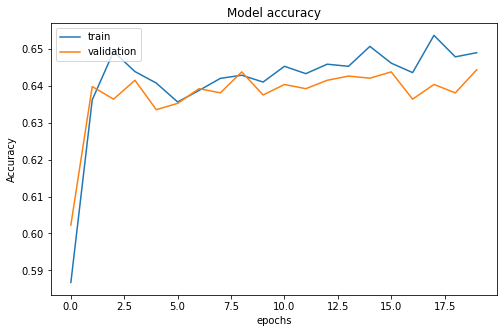

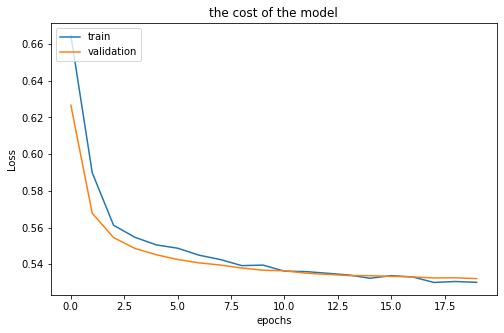

In [89]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20)
# summarize history for accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('the cost of the model')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [90]:
model.evaluate(X_test, y_test)

69/69 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.6545


[0.5198132991790771, 0.6545454263687134]

The epoches show that there is no overfitting and the model can genrealize to new data with the above accuracy.

In [91]:
#check with sigmoid

model = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(10, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="relu"),
    layers.Dense(2, activation="sigmoid")
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                40        
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
185/185 [==============================] - 1s 2ms/step - loss: 0.7126 - accuracy: 0.5172 - val_loss: 0.6533 - val_accuracy: 0.5926
Epoch 2/20
185/185 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.6076 - val_loss: 0.6114 - val_accuracy: 0.6129
Epoch 3/20
185/185 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.6329 - val_loss: 0.5826 - val_accuracy: 0.6360
Epoch 4/20
185/185 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.6378 - val_loss: 0.5673 - val_accuracy: 0.6333
Epoch 5/20
185/185 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.6516 - val_loss: 0.5585 - val_accuracy: 0.6402
Epoch 6/20
185/185 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.6470 - val_loss: 0.5535 - val_accuracy: 0.6388
Epoch 7/20
185/185 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.6460 - val_loss: 0.5496 - val_accuracy: 0.6384
Epoch 

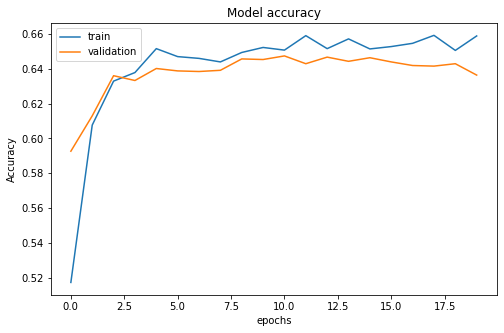

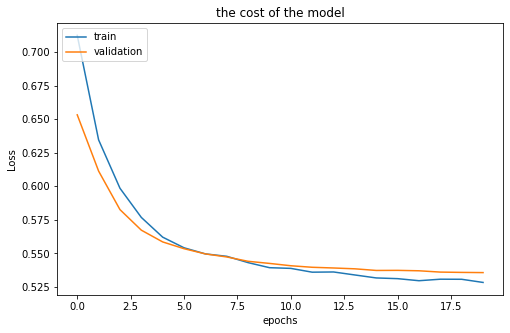

In [92]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=20)
# summarize history for accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('the cost of the model')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [93]:
model.evaluate(X_test, y_test)

69/69 [==============================] - 0s 844us/step - loss: 0.5210 - accuracy: 0.6623


[0.5210375189781189, 0.6622727513313293]

The MLP model accuracy is slightly better than Sequnetial but still the tree model achieved slightley better than MLP and Sequential.

This means that complex solutions are not always good for every solution. In a situation where there is little correlation of the variables, and the distributions are not normal, non-parametric models may work better than parametric models. However, the hypothesis can be confirmed using the neural network modelwith the above accuracies.

# # Part 5. Research Question (Finding Interesting Properties)

Finding interesting Marketing/Business to get he most out of the data with insights to help the product reach on time and to get higher customer ratings:


1- Does the number of customer calls affect on the shipment being reached on time? 

2- What is The Number of Times The Products Stored In Each Warehouse Arrive on Time?

3- What are the factors or attributes that affect the customer rating for the products?

4- Was the Customer query being answered?

5- Which Products, Customer service have to pay more attention to?

6- Does more Discount offered leads to increasing the customer rating?


In [94]:
dataR.head()

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                3                 0                    4                2   
1                4                 0                    4                5   
2                0                 0                    2                2   
3                1                 0                    3                3   
4                2                 0                    2                2   

   Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
0                  177              3.0                   1       0   
1                  216              2.0                   1       1   
2                  183              4.0                   1       1   
3                  176              4.0                   2       1   
4                  184              3.0                   2       0   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

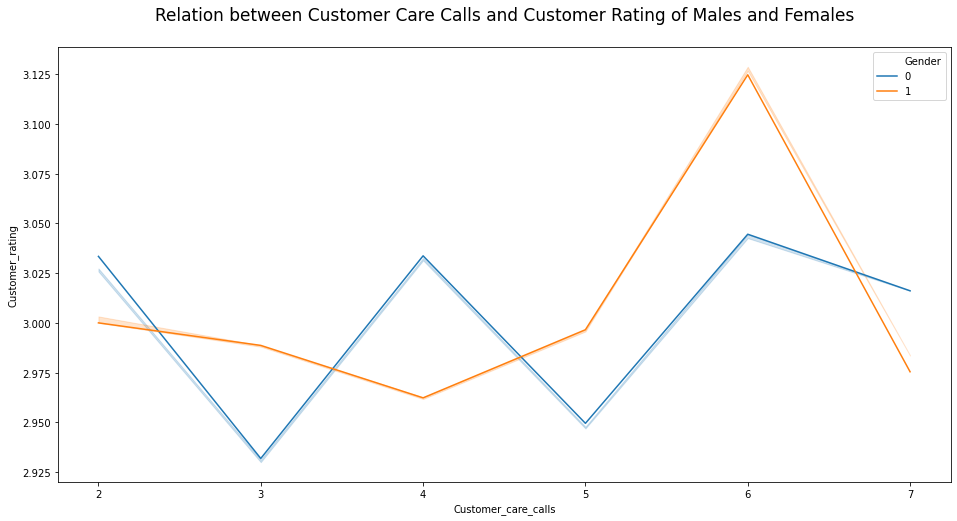

In [95]:
#1 check the relation between customer care calls, customer ratings and gender

plt.figure(figsize = (16, 8))
sns.lineplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Gender', data = dataR, ci = 1)
plt.title('Relation between Customer Care Calls and Customer Rating of Males and Females\n', fontsize = 17)
plt.show()

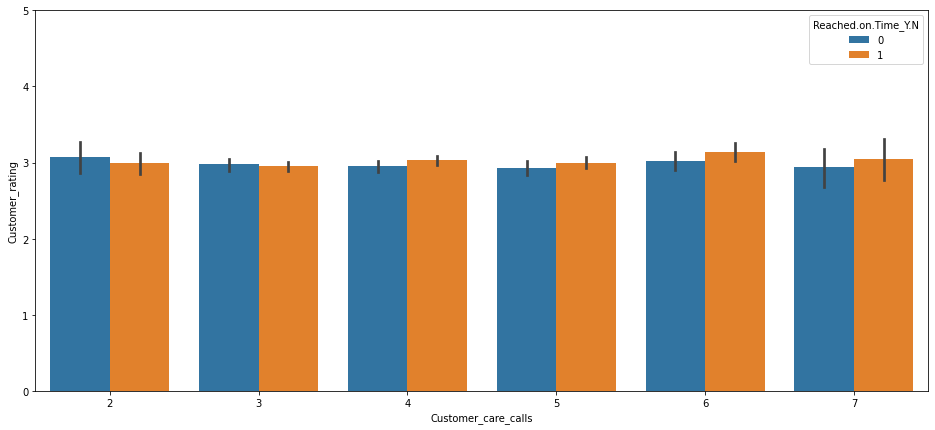

In [96]:
# checking the relation between customer care calls, customer ratings and reached on time.

plt.figure(figsize = (16, 7))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = dataR)
plt.ylim(0, 5)
plt.show()

1-Does the number of customer calls affect on the shipment being reached on time? 

Yes, When Customers calls increase (>= 4), the number of shipments reached on time would become higher than shipments that were not reached on time.

This means that customer care calls is playing important role for reaching the shipment to the cusomters on time.

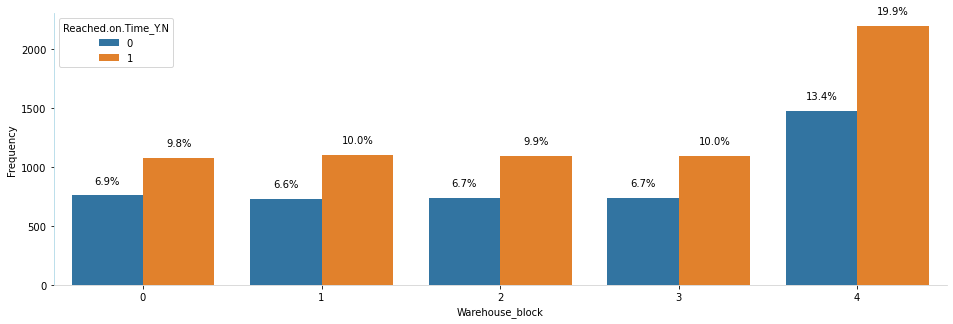

In [97]:
#2 What is The Number of Times The Products Stored In Each Warehouse Arrive on Time?
plt.figure(figsize=(16,5))

# plot
total = float(len(dataR)) 

ax = sns.countplot(x="Warehouse_block", data=dataR, hue='Reached.on.Time_Y.N');
sns.despine(top=True, right=True, left=False, bottom=False);
ax.spines['left'].set_color('lightblue');
ax.spines['bottom'].set_color('lightgray');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{0:.1%}'.format(height/total),
            ha="center", fontsize=10)
    
ax.set_ylabel('Frequency');


From the above chart, it shows that the arrival of shipments does not depend on the warehouse where it is stored.

In [98]:
#3 What are the factors or attributes that affect the customer rating for the products?

#Customer Rating Correlation:
print("Customer Rating Correlation with the following attributes:\n")

features=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
          'Cost_of_the_Product', 'Prior_purchases','Product_importance', 
          'Gender','Reached.on.Time_Y.N']
for f in features:
    related = dataR['Customer_rating'].corr(dataR[f])
    print("%s: %f" % (f,related))

Customer Rating Correlation with the following attributes:

Warehouse_block: 0.010169
Mode_of_Shipment: 0.001679
Customer_care_calls: 0.012209
Cost_of_the_Product: 0.009270
Prior_purchases: 0.008450
Product_importance: 0.003157
Gender: 0.002775
Reached.on.Time_Y.N: 0.013119


Text(0, 0.5, 'Customer Ratings')

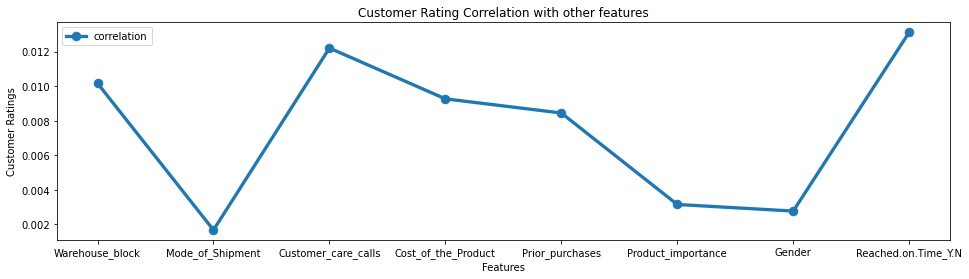

In [99]:
#visulize the figures
correlations = [dataR['Customer_rating'].corr(dataR[f]) for f in features ]
features_df = pd.DataFrame({'attributes': features, 'correlation': correlations}) 
features_df.plot(x ='attributes', y='correlation', kind = 'line',
                    figsize=(16,4), title='Customer Rating Correlation with other features',\
                    linewidth=3.3, marker='.', markersize=17)                

plt.xlabel('Features')
plt.ylabel('Customer Ratings')

In [100]:
features=["Customer_care_calls","Reached.on.Time_Y.N"]
for f in features:
    related = dataR['Customer_rating'].corr(dataR[f])

Text(0, 0.5, 'Customer Ratings')

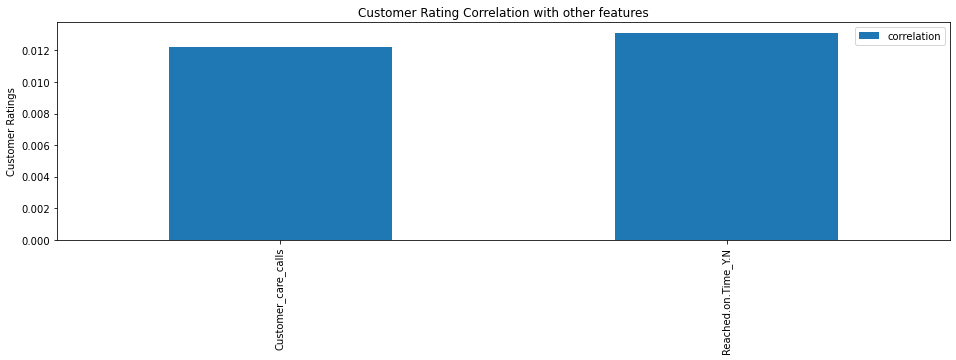

In [101]:
correlations = [dataR['Customer_rating'].corr(dataR[f]) for f in features ]
features_df = pd.DataFrame({'attributes': features, 'correlation': correlations}) 
features_df.plot(x ='attributes', y='correlation', figsize=(16,4), 
                 title='Customer Rating Correlation with other features', kind = 'bar')                
plt.xlabel('')
plt.ylabel('Customer Ratings')

3-What are the factors or attributes that affect the customer rating for the products?

The chart above clarifies that there is a high correlation between the Customer Rating and (Reach on Time, Prior Purchase, Customer Care Calls, cost of Products and Warehouse). 

Conclusion: customers who are satisfied in these areas (Cost of the product, Custmer care calls, Prior Purchase and being the product reahced on time) are likely to give the product better ratings.The most 2 factor that affect on the ratings are Reached on time and Customer care calls.

And also from the first question above, it showed that customer care calls playing important role in reaching the shipment to the cusomters on time.

Solution : Marketing team have to pay more attention to those 2 factors to improve the customer ratings further more.

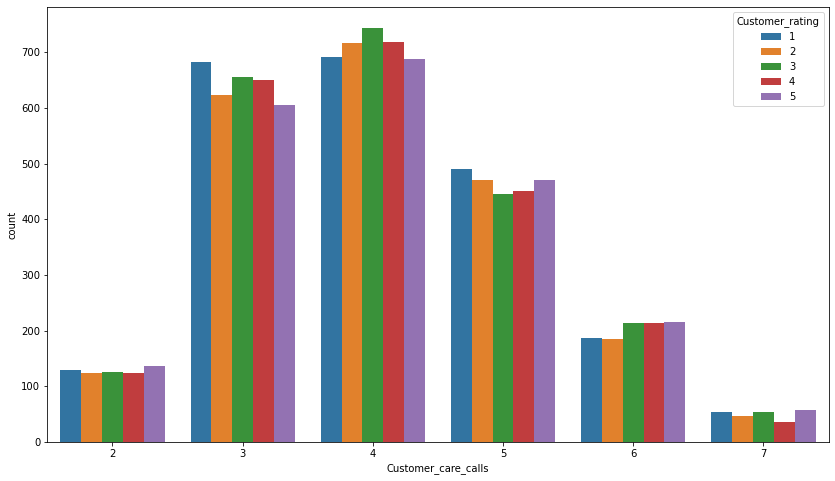

In [102]:
#4 Was the Customer query being answered?
plt.figure(figsize= (14,8))
sns.countplot(data=dataR,x='Customer_care_calls',hue='Customer_rating')

Conclusion: 
1- Customers give 5 rate with 2 calls rather than calling more than 2 times
2- When the customers call more than 3 times the rating of only 3 is get high

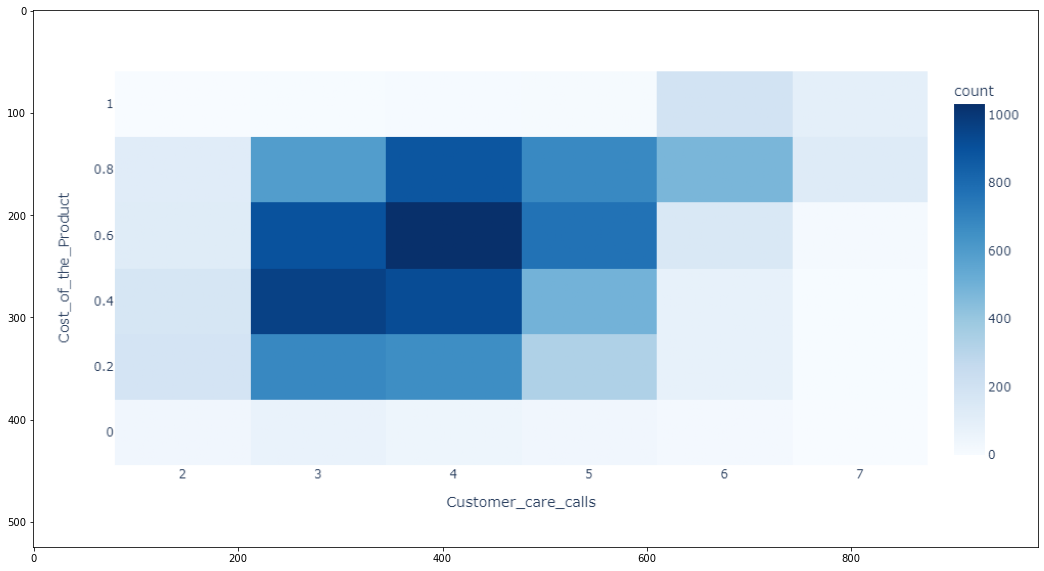

In [103]:
#5 Which Products, Customer service have to pay more attention to?
fig = px.density_heatmap(df, x="Customer_care_calls", y="Cost_of_the_Product", 
                         nbinsx=10, nbinsy=10, color_continuous_scale="Blues")

fig.show()

# in case ploty express does not display in Github / Gitlab / Google Colab
# Workaround to display the ploty express heat map created by the above code as png that wa saved from the above code 
#in Jupyter Notebook

import matplotlib.image as mpimg
img = mpimg.imread('newplot.png')
plt.figure(figsize = (18, 20))
imgplot = plt.imshow(img)
plt.show()

Conclusion: The prices of the most ordered products are between 250 and 300 with 6 or 7 Customer calls.

For 2 or 4 calls, the price drops to between 150-200. In this case, as the price of the product gets more expensive, people tend to call customer service more. 

Solution: The customer service has to pay more attention for prodcuts prices more than 250 $. Hence, this will increase the customer ratings as the previous analysis above.

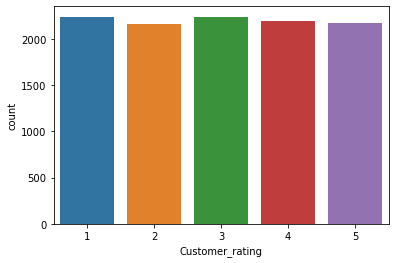

In [104]:
#6 Does more Discount offered leads to increasing the customer rating?

queryDiscount=dataR[dataR['Discount_offered'] >= 10.5]
sns.countplot(data=dataR,x='Customer_rating')

Customer Rating with discount >= 10.5


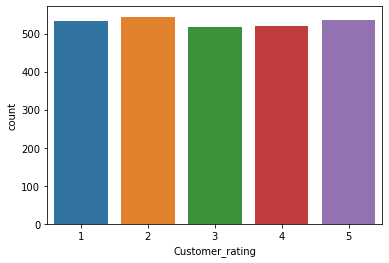

In [105]:
print("Customer Rating with discount >= 10.5")
sns.countplot(data=queryDiscount, x='Customer_rating')

The accuracy of the DT model: 68.14%


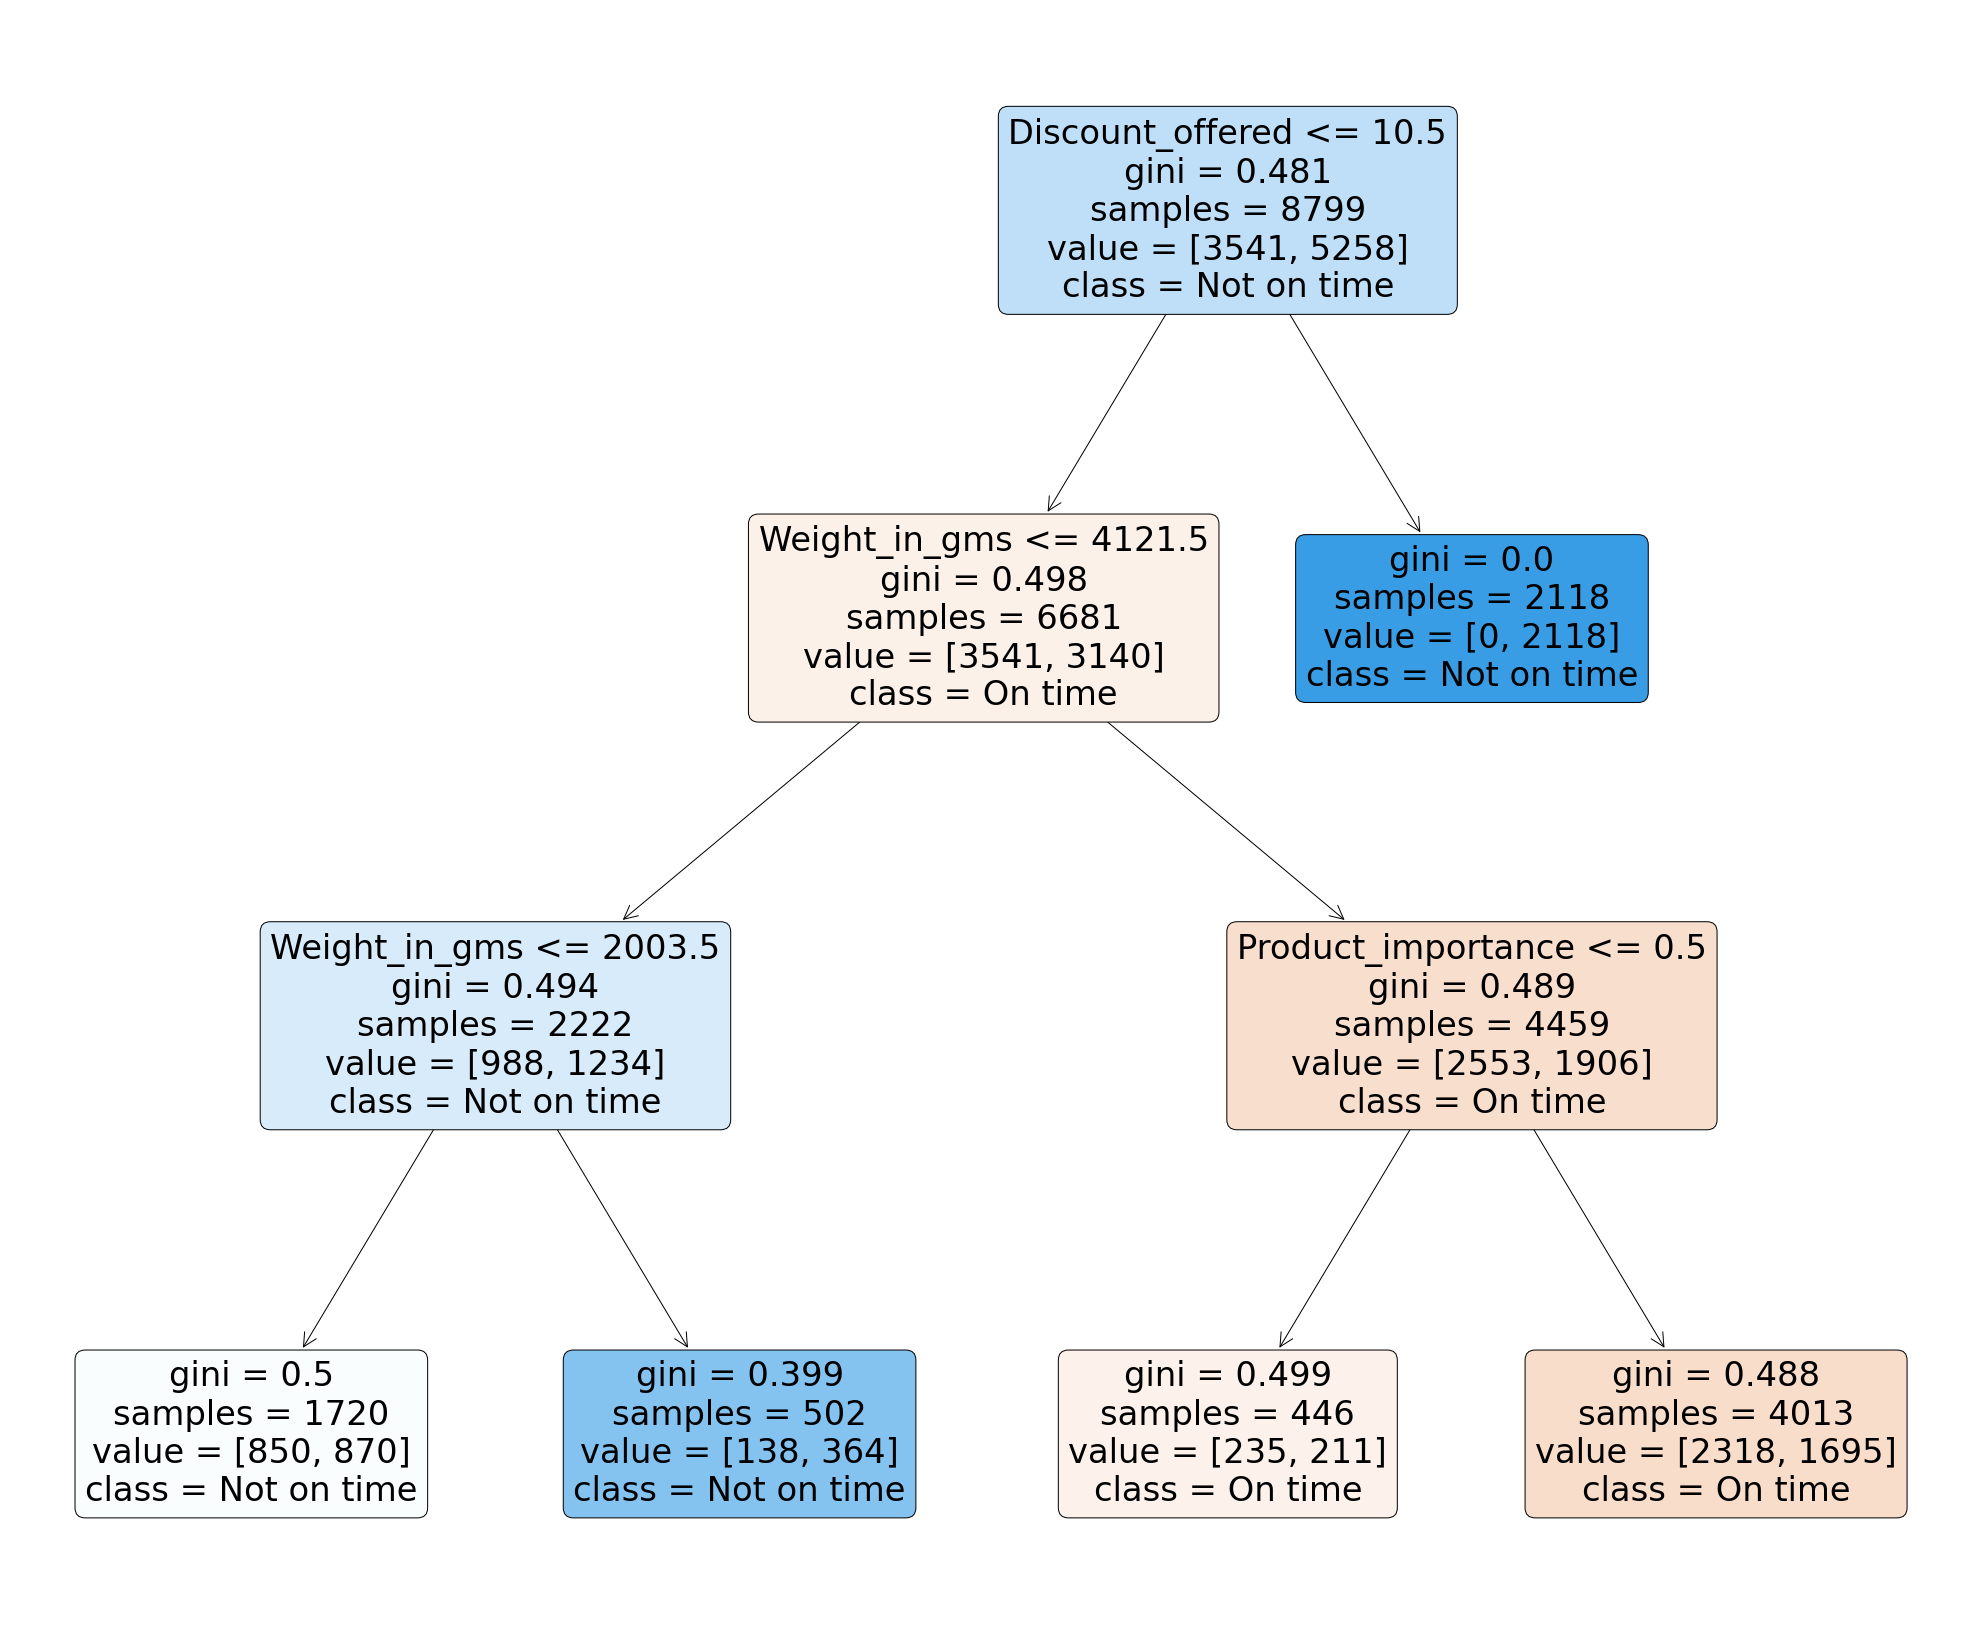

In [106]:
#decision tree  to check the discount offered 
x = dataR[["Discount_offered", "Weight_in_gms", "Product_importance"]]
y = dataR["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
tree_model = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
#print("Accuracy on Training data   :", tree_model.score(X_train, y_train) * 100)
print(f"The accuracy of the DT model: {100*acc:.2f}%")
plt.figure(figsize=(35,30))
plot_tree(tree_model, filled=True, rounded=True, feature_names=X_train.columns, class_names=["On time","Not on time"])
plt.show()
#A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances 
#it applies to belong to the same class. 

Shipments with more than 10.5 discount did not arrive on time. This could be because the company was giving discounts on delayed products. The greater the delay, the greater the discount.

However, Higher Discount offered leads to slightly higher Customer Rating of 5. Hence delayed Shipment with heigher discount will still can get higher rate.

With the above insights for Part6 we got many interesting info and connected relationship from the data that can be used by decision makers to enhance the customer rating, shipment of the products, customer care service and discount offered.